# Broadband Outage Detection

### Problem Description:

    India is seeing an explosion of new competitors in the Broadband space. 'India Broadband' is
a company that is now seeing a lot of customer churn due to customer dissatisfaction
because of broadband outages.

The company has now curated a dataset, where it tracks several variables that it believes
impact the `outage_duration`. They have tracked three different outage durations, `0` for
no outage, `1` for short outages that last anywhere between a few minutes and a maximum
of 2 hours, and `2` for long outages that can last from 2 hours to sometimes even a couple
of days.

You will now have to use these metrics that the company has tracked to create a machine
learning model that will be able to predict the `outage_duration` so that the company can
better handle outages and improve customer satisfaction and therefore reduce customer
churn.

In this hackathon, you will now have to use these metrics that the company has tracked to
create a machine learning model that will be able to predict the `outage_duration` so that
the company can better handle outages and improve customer satisfaction and therefore 
reduce customer churn.

**About Data:**

There are 7 CSV files provided to us, they are described below:

● `train_data.csv`: It has a unique event `id` for each observation of the
`outage_duration` in a particular `area_code`

● `test_data.csv`: Similar to the train dataset, we are provided with an `id` and an
`area_code`, we are expected to predict the `outage_duration` for each of the
records. (This will be provided to you later on 4th July)

● `broadband_data.csv`: For each of the event `id`s mentioned in the `train_data.csv`
and `test_data.csv` files and also some additional `id`s there is a record of the
`broadband_type` that is stored in the dataset. There are `10 different types` of
broadbands that are observed in the dataset

● `outage_data.csv`: For each of the event `id`s mentioned in the `train_data.csv` and
`test_data.csv` files and also some additional `id`s there is a record of the
`outage_type` that is stored in the dataset. There are `5` different `outage_type`'s
recorded in the dataset.

● `report_data.csv`: For each event `id` there are `log_report_type` and `volume`
columns are recorded. `log_report_type` is a type of the recorded report generated
by a technical team member after evaluating the outage. `volume` is the volume of
data handled in the area at the time of report in custom company specific units.

● `server_data.csv`: For each of the event `id`s mentioned in the `train_data.csv` and
`test_data.csv` files and also some additional `id`s there is a record of the
`transit_server_type` that is stored in the dataset. Transit Servers handle the
requests and responses of the customers.

● `sample_submission.csv`: The format of CSV file required for submission to the
evaluation backend. (Please remember that the prediction file which you are going
to upload to tool, to check out what is your score should be of the same format as
this file)

**Description of the columns present in the dataset.**

● `id` is the instance where the event was recorded when there was
an outage in the broadband connectivity in an area

● `area_code` is a categorical column, in which each unique value
refers to an area where the `outage_duration` has been measured

● `broadband_type` is the technology that the ISP uses for
delivering broadband internet connection, there can be multiple
types of broadband connections in a single area

● `outage_type` signifies the `5` different types of outages as
classified by the engineering experts who remotely diagnose the
issue, once reported

● The `log_report_type` column signifies one of the `386` different
types of reports generated by customer service representatives
who record issues and classify them as one of the 386 different
types of issues

● `transit_server_type` is the type of transit server that handles
the traffic of data and route the incoming and outgoing web
traffic

● `volume` is the recorded data, in masked units, for 10 minutes
prior to the time of recording the observation as per custom
company specific units.

**Answering questions from the operations team:**

The operations team at ‘India Broadband’ has asked you the following questions

● Which areas are most prone to long outage durations?

● Which broadband types are suspect of long outage durations?

● Any other recommendations to improve the detection of outage durations.

**Evaluation Metric:**

The evaluation metric used for this hackathon would be the **F1 Macro Average.**



In [1]:

# Loading Libraries

import pandas as pd
import numpy as np

# Visualization

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

pd.set_option('display.max_columns',None)  
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning) 


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  app.launch_new_instance()


## Reading datasets

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

broadband = pd.read_csv('broadband_data.csv')
outage = pd.read_csv('outage_data.csv')
report = pd.read_csv('report_data.csv')
server = pd.read_csv('server_data.csv')

submission = pd.read_csv('sample_submission.csv')

**Train Data**

In [3]:
train

,id,area_code,outage_duration
0,13366,area_415,1
1,6783,area_474,0
2,9519,area_931,1
3,10202,area_700,1
4,4555,area_600,2
...,...,...,...
5899,1910,area_403,1
5900,10475,area_821,0
5901,10675,area_798,2
5902,14714,area_210,0


In [4]:
train.dtypes

id                 int64 
area_code          object
outage_duration    int64 
dtype: object

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5904.0,9323.841972,5338.654942,1.0,4763.5,9330.5,13932.75,18550.0
outage_duration,5904.0,0.450203,0.666642,0.0,0.0,0.0,1.00,2.0


**Test Data**

In [6]:
test

,id,area_code
0,3340,area_344
1,14067,area_933
2,1134,area_16
3,27,area_793
4,9793,area_344
...,...,...
1472,7975,area_124
1473,10664,area_821
1474,7753,area_476
1475,989,area_38


In [7]:
test

,id,area_code
0,3340,area_344
1,14067,area_933
2,1134,area_16
3,27,area_793
4,9793,area_344
...,...,...
1472,7975,area_124
1473,10664,area_821
1474,7753,area_476
1475,989,area_38


**Outage Data**

In [8]:
outage

,id,outage_type
0,6597,outage_type_2
1,8011,outage_type_2
2,2597,outage_type_2
3,5022,outage_type_1
4,6852,outage_type_1
...,...,...
18547,3761,outage_type_1
18548,8720,outage_type_1
18549,6488,outage_type_2
18550,878,outage_type_2


In [9]:
outage.dtypes

id             int64 
outage_type    object
dtype: object

In [10]:
outage_max = outage.groupby(by=['id'])['outage_type'].max()

### Merging Train data and test data with outage data 

In [11]:
df1 = pd.merge(train, outage_max, on='id')

In [12]:
test_df1 = pd.merge(test, outage_max, on='id')

In [13]:
df1.shape

(5904, 4)

In [14]:
test_df1.shape

(1477, 3)

**Report Data**

In [15]:
report

,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1
...,...,...,...
58666,8720,log_report_type_209,1
58667,6488,log_report_type_54,3
58668,878,log_report_type_62,1
58669,4464,log_report_type_209,1


In [16]:
report['id'].nunique()

18552

In [17]:
report['volume'].nunique()

341

In [18]:
report['log_report_type'].nunique()

386

In [19]:
report['log_report_type'].unique()

array(['log_report_type_68', 'log_report_type_172', 'log_report_type_56',
       'log_report_type_193', 'log_report_type_71', 'log_report_type_201',
       'log_report_type_80', 'log_report_type_203', 'log_report_type_82',
       'log_report_type_111', 'log_report_type_219',
       'log_report_type_134', 'log_report_type_159',
       'log_report_type_198', 'log_report_type_76', 'log_report_type_167',
       'log_report_type_51', 'log_report_type_228', 'log_report_type_230',
       'log_report_type_308', 'log_report_type_310',
       'log_report_type_301', 'log_report_type_221',
       'log_report_type_307', 'log_report_type_312',
       'log_report_type_232', 'log_report_type_227',
       'log_report_type_160', 'log_report_type_309',
       'log_report_type_229', 'log_report_type_181',
       'log_report_type_314', 'log_report_type_313',
       'log_report_type_234', 'log_report_type_233', 'log_report_type_84',
       'log_report_type_205', 'log_report_type_54', 'log_report_type_170',


In [20]:
report.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58671.0,9271.368905,5355.142878,1.0,4658.5,9275.0,13903.0,18552.0
volume,58671.0,9.685296,27.314433,1.0,1.0,2.0,7.0,1310.0


In [21]:
report.dtypes

id                 int64 
log_report_type    object
volume             int64 
dtype: object

 **'volume' is the recorded data, in masked units, for 10 minutes prior to the time of recording the observation as per custom company specific units.**

**Lets find out total volume of records per id.**

In [22]:
report.groupby('id').volume.agg('sum').sort_values(ascending = False)

id
13914    1649
9030     1586
5998     1465
7686     1333
13828    1222
         ... 
12677    1   
14296    1   
9229     1   
12678    1   
14770    1   
Name: volume, Length: 18552, dtype: int64

In [23]:
report[report.id == 12677]            # verifying

,id,log_report_type,volume
6817,12677,log_report_type_82,1


In [24]:
volume_per_id = report.groupby('id').volume.agg('sum')

### Merging train & test data with volume_per_id

In [25]:
df2 = pd.merge(df1, volume_per_id, on = 'id' )

In [26]:
df2.shape

(5904, 5)

In [27]:
test_df2 = pd.merge(test_df1, volume_per_id, on ='id')

In [28]:
test_df2.shape

(1477, 4)

**Lets find out total log of records per id.**

In [29]:
report.groupby('id').log_report_type.agg('count').sort_values(ascending = False)

id
15184    20
5233     20
12575    19
9266     18
626      18
         ..
2531     1 
5590     1 
2526     1 
14548    1 
15059    1 
Name: log_report_type, Length: 18552, dtype: int64

In [30]:
report[report.id == 15184]            # verifying

,id,log_report_type,volume
51800,15184,log_report_type_377,5
51801,15184,log_report_type_290,11
51802,15184,log_report_type_288,1
51803,15184,log_report_type_375,45
51804,15184,log_report_type_372,1
51805,15184,log_report_type_368,43
51806,15184,log_report_type_370,4
51807,15184,log_report_type_374,4
51808,15184,log_report_type_285,1
51809,15184,log_report_type_282,1


In [31]:
log_per_id = pd.DataFrame(report.groupby(['id']).log_report_type.agg('count'))

In [32]:
log_per_id.reset_index(inplace=True)

In [33]:
log_per_id.rename(columns = {'log_report_type':'log_per_id'}, inplace = True) 

In [34]:
log_per_id.shape

(18552, 2)

In [35]:
log_per_id.head()

,id,log_per_id
0,1,3
1,2,5
2,3,1
3,4,1
4,5,2


In [36]:
log_per_id[log_per_id.id == 15184]             # verifying

,id,log_per_id
15183,15184,20


In [37]:
log_per_id.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18552.0,9276.500000,5355.645433,1.0,4638.75,9276.5,13914.25,18552.0
log_per_id,18552.0,3.162516,2.156997,1.0,2.00,2.0,4.00,20.0


### Merging train & test data with log_per_id 

In [38]:
df3 = pd.merge(df2, log_per_id, on='id') 

In [39]:
df3.shape

(5904, 6)

In [40]:
test_df3 = pd.merge(test_df2, log_per_id, on='id') 

In [41]:
test_df3.shape

(1477, 5)

In [42]:
log_report_max = report.groupby(by=['id'])['log_report_type'].max()

### Merging train & test data with log_report_type

In [43]:
df4 = pd.merge(df3, log_report_max, on = 'id')

In [44]:
df4.shape

(5904, 7)

In [45]:
test_df4 = pd.merge(test_df3, log_report_max, on = 'id')

In [46]:
test_df4.shape

(1477, 6)

In [47]:
volume_per_log_type = pd.DataFrame(report.groupby(['log_report_type']).volume.agg('sum'))

In [48]:
volume_per_log_type.reset_index(inplace=True)

In [49]:
volume_per_log_type.rename(columns = {'volume':'volume_per_log'}, inplace = True) 

In [50]:
volume_per_log_type.head()

,log_report_type,volume_per_log
0,log_report_type_1,22
1,log_report_type_10,71
2,log_report_type_100,2
3,log_report_type_101,4643
4,log_report_type_102,4


In [51]:
volume_per_log_type.shape

(386, 2)

In [52]:
volume_per_log_type.log_report_type.nunique()

386

In [53]:
volume_per_log_type.describe().T

,count,mean,std,min,25%,50%,75%,max
volume_per_log,386.0,1472.139896,6498.323753,1.0,2.0,13.5,148.5,75739.0


**Which of the log_report_type has more than 150 volume ?**

In [54]:
Volume_greater_than_150 = volume_per_log_type[volume_per_log_type.volume_per_log >= 150]

In [55]:
Volume_greater_than_150.shape

(96, 2)

In [56]:
Volume_greater_than_150.head()

,log_report_type,volume_per_log
3,log_report_type_101,4643
5,log_report_type_103,5900
7,log_report_type_105,2265
9,log_report_type_107,442
10,log_report_type_108,152


In [57]:
# Total no.of log_report_type which has more than 150 volume.

Volume_greater_than_150.log_report_type.nunique()

96

**Out of 386 log_report_type, 96 log_report_type as shown below has more than 150 volume.**

In [58]:
Volume_greater_than_150.log_report_type.unique()

array(['log_report_type_101', 'log_report_type_103',
       'log_report_type_105', 'log_report_type_107',
       'log_report_type_108', 'log_report_type_109',
       'log_report_type_110', 'log_report_type_111',
       'log_report_type_134', 'log_report_type_135',
       'log_report_type_153', 'log_report_type_155',
       'log_report_type_160', 'log_report_type_163',
       'log_report_type_167', 'log_report_type_170',
       'log_report_type_171', 'log_report_type_172',
       'log_report_type_179', 'log_report_type_182',
       'log_report_type_191', 'log_report_type_193',
       'log_report_type_195', 'log_report_type_196',
       'log_report_type_197', 'log_report_type_198',
       'log_report_type_201', 'log_report_type_202',
       'log_report_type_203', 'log_report_type_204',
       'log_report_type_209', 'log_report_type_211',
       'log_report_type_219', 'log_report_type_221',
       'log_report_type_222', 'log_report_type_223',
       'log_report_type_227', 'log_report_type

**Server Data**

In [59]:
server

,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11
...,...,...
31165,3761,transit_server_type_11
31166,8720,transit_server_type_11
31167,6488,transit_server_type_11
31168,878,transit_server_type_11


In [60]:
server['id'].nunique()

18552

In [61]:
server['transit_server_type'].nunique()

53

In [62]:
a_s_t_n = server['transit_server_type']

a,s,t,n = zip(*(s.split("_") for s in a_s_t_n))

server['transit_server_type_no'] = n

In [63]:
server

,id,transit_server_type,transit_server_type_no
0,6597,transit_server_type_11,11
1,8011,transit_server_type_15,15
2,2597,transit_server_type_15,15
3,5022,transit_server_type_15,15
4,5022,transit_server_type_11,11
...,...,...,...
31165,3761,transit_server_type_11,11
31166,8720,transit_server_type_11,11
31167,6488,transit_server_type_11,11
31168,878,transit_server_type_11,11


In [64]:
server.dtypes

id                        int64 
transit_server_type       object
transit_server_type_no    object
dtype: object

In [65]:
server['transit_server_type_no'] = server['transit_server_type_no'].astype('int64')

In [66]:
server.dtypes

id                        int64 
transit_server_type       object
transit_server_type_no    int64 
dtype: object

In [67]:
server.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,31170,NaN,NaN,NaN,9267.74,5363.82,1,4625.25,9287.5,13915,18552
transit_server_type,31170,53,transit_server_type_11,7888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transit_server_type_no,31170,NaN,NaN,NaN,24.7407,12.1522,1,11,23,35,54


In [68]:
server.groupby('id')['transit_server_type'].agg('count').sort_values(ascending = False)

id
10354    11
14243    10
15184    10
8590     9 
17023    9 
        .. 
6958     1 
6957     1 
6956     1 
6954     1 
9276     1 
Name: transit_server_type, Length: 18552, dtype: int64

In [69]:
server[server.id == 10354]      # verifying

,id,transit_server_type,transit_server_type_no
27351,10354,transit_server_type_53,53
27352,10354,transit_server_type_42,42
27353,10354,transit_server_type_20,20
27354,10354,transit_server_type_43,43
27355,10354,transit_server_type_45,45
27356,10354,transit_server_type_49,49
27357,10354,transit_server_type_11,11
27358,10354,transit_server_type_47,47
27359,10354,transit_server_type_21,21
27360,10354,transit_server_type_44,44


In [70]:
server_per_id = pd.DataFrame(server.groupby('id')['transit_server_type'].agg('count')) 

In [71]:
server_per_id.reset_index(inplace=True)

In [72]:
server_per_id.rename(columns = {'transit_server_type':'server_per_id'}, inplace = True) 

In [73]:
server_per_id.shape

(18552, 2)

In [74]:
server_per_id.head()

,id,server_per_id
0,1,2
1,2,2
2,3,1
3,4,1
4,5,2


In [75]:
server_per_id[server_per_id.id == 10354]           # verifying

,id,server_per_id
10353,10354,11


In [76]:
server_per_id.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18552.0,9276.500000,5355.645433,1.0,4638.75,9276.5,13914.25,18552.0
server_per_id,18552.0,1.680142,0.716816,1.0,1.00,2.0,2.00,11.0


### Merging train & test data with server_per_id 

In [77]:
df5 = pd.merge(df4, server_per_id, on = 'id')

In [78]:
df5.shape

(5904, 8)

In [79]:
test_df5 = pd.merge(test_df4, server_per_id, on = 'id')

In [80]:
test_df5.shape

(1477, 7)

In [81]:
server_max = server.groupby(['id'])['transit_server_type'].max()

### Merging train & test data with transit_server_type

In [82]:
df6 = pd.merge(df5, server_max, on = 'id')

In [83]:
df6.shape

(5904, 9)

In [84]:
test_df6 = pd.merge(test_df5, server_max, on = 'id')

In [85]:
test_df6.shape

(1477, 8)

**Broadband Data**

In [86]:
broadband

,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8
2,2597,broadband_type_8
3,5022,broadband_type_8
4,6852,broadband_type_8
...,...,...
21071,3761,broadband_type_8
21072,8720,broadband_type_8
21073,6488,broadband_type_8
21074,878,broadband_type_8


In [87]:
broadband.dtypes

id                int64 
broadband_type    object
dtype: object

In [88]:
b_t_n = broadband['broadband_type']

b,t,n = zip(*(s.split("_") for s in b_t_n))

broadband['broadband_type_no'] = n

In [89]:
broadband.groupby('id')['broadband_type'].agg('count').sort_values(ascending = False)

id
7194     5
1379     5
16268    5
617      5
3700     5
        ..
11964    1
11963    1
11962    1
11960    1
9276     1
Name: broadband_type, Length: 18552, dtype: int64

In [90]:
broadband[broadband.id == 7194]              # verifying

,id,broadband_type,broadband_type_no
15490,7194,broadband_type_7,7
15491,7194,broadband_type_4,4
15492,7194,broadband_type_6,6
15493,7194,broadband_type_10,10
15494,7194,broadband_type_8,8


**Lets find out total no.of broadband used by per customer.**

In [91]:
broadband_per_id = pd.DataFrame(broadband.groupby('id')['broadband_type'].agg('count'))

In [92]:
broadband_per_id.reset_index(inplace=True)

In [93]:
broadband_per_id.rename(columns = {'broadband_type':'broadband_per_id'}, inplace = True) 

In [94]:
broadband_per_id.shape

(18552, 2)

In [95]:
broadband_per_id.head()

,id,broadband_per_id
0,1,2
1,2,1
2,3,1
3,4,1
4,5,1


In [96]:
broadband_per_id.dtypes

id                  int64
broadband_per_id    int64
dtype: object

In [97]:
broadband_per_id.broadband_per_id.unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [98]:
broadband_per_id.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18552.0,9276.50000,5355.645433,1.0,4638.75,9276.5,13914.25,18552.0
broadband_per_id,18552.0,1.13605,0.412110,1.0,1.00,1.0,1.00,5.0


### Merging train & test data with broadband_per_id	

In [99]:
df7 = pd.merge(df6, broadband_per_id, on = 'id') 

In [100]:
df7.shape

(5904, 10)

In [101]:
test_df7 = pd.merge(test_df6, broadband_per_id, on = 'id') 

In [102]:
test_df7.shape

(1477, 9)

### Merging train & test data with broadband type

In [103]:
broadband_max = broadband.groupby('id')['broadband_type'].max()

In [104]:
df8 = pd.merge(df7, broadband_max, on = 'id')

In [105]:
df8.shape

(5904, 11)

In [106]:
test_df8 = pd.merge(test_df7, broadband_max, on ='id')

In [107]:
test_df8.shape

(1477, 10)

We will save both of our merged **train** and **test** to new files.

In [108]:
df8.to_csv('train_merge.csv', index = False)

test_df8.to_csv('test_merge.csv', index = False)

In [109]:
data = pd.read_csv('train_merge.csv')
test = pd.read_csv('test_merge.csv')

Now we will check unique values in each attribute of both **train** and **test** set.

In [110]:
print(data.shape)
for i in data.columns.values:
    print (i)
    print (len(data[i].unique()))
    print("----------")

(5904, 11)
id
5904
----------
area_code
876
----------
outage_duration
3
----------
outage_type
5
----------
volume
333
----------
log_per_id
19
----------
log_report_type
147
----------
server_per_id
8
----------
transit_server_type
40
----------
broadband_per_id
5
----------
broadband_type
8
----------


In [111]:
print(test.shape)
for i in test.columns.values:
    print (i)
    print (len(test[i].unique()))
    print("----------")

(1477, 10)
id
1477
----------
area_code
531
----------
outage_type
4
----------
volume
168
----------
log_per_id
17
----------
log_report_type
86
----------
server_per_id
6
----------
transit_server_type
34
----------
broadband_per_id
5
----------
broadband_type
6
----------


Levels of attributes are **mismatched**

**Numerical Summary of Train & Test**

In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5904.0,9323.841972,5338.654942,1.0,4763.5,9330.5,13932.75,18550.0
outage_duration,5904.0,0.450203,0.666642,0.0,0.0,0.0,1.00,2.0
volume,5904.0,32.354505,81.161794,1.0,3.0,8.0,26.00,1649.0
log_per_id,5904.0,3.217310,2.232929,1.0,2.0,2.0,4.00,19.0
server_per_id,5904.0,1.688347,0.723573,1.0,1.0,2.0,2.00,9.0
broadband_per_id,5904.0,1.143970,0.437840,1.0,1.0,1.0,1.00,5.0


In [113]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1477.0,9028.037915,5386.914923,8.0,4236.0,8810.0,13742.0,18539.0
volume,1477.0,29.684496,69.264834,1.0,3.0,8.0,25.0,857.0
log_per_id,1477.0,3.287745,2.299804,1.0,2.0,2.0,4.0,18.0
server_per_id,1477.0,1.692620,0.733652,1.0,1.0,2.0,2.0,6.0
broadband_per_id,1477.0,1.155044,0.457914,1.0,1.0,1.0,1.0,5.0


### Checking for Null values.

In [114]:
data.isnull().sum()

id                     0
area_code              0
outage_duration        0
outage_type            0
volume                 0
log_per_id             0
log_report_type        0
server_per_id          0
transit_server_type    0
broadband_per_id       0
broadband_type         0
dtype: int64

In [115]:
test.isnull().sum()

id                     0
area_code              0
outage_type            0
volume                 0
log_per_id             0
log_report_type        0
server_per_id          0
transit_server_type    0
broadband_per_id       0
broadband_type         0
dtype: int64

In [116]:
data.dtypes

id                     int64 
area_code              object
outage_duration        int64 
outage_type            object
volume                 int64 
log_per_id             int64 
log_report_type        object
server_per_id          int64 
transit_server_type    object
broadband_per_id       int64 
broadband_type         object
dtype: object

In [117]:
test.dtypes

id                     int64 
area_code              object
outage_type            object
volume                 int64 
log_per_id             int64 
log_report_type        object
server_per_id          int64 
transit_server_type    object
broadband_per_id       int64 
broadband_type         object
dtype: object

## EDA

In [118]:
# Extracting number from area_code column and creating new variable.

a_c = data['area_code']

a,c = zip(*(s.split("_") for s in a_c))

data['area_code_no'] = c

In [119]:
data['area_code_no'] = data['area_code_no'].astype('int64')

**Visualizing no.of customers based on area**

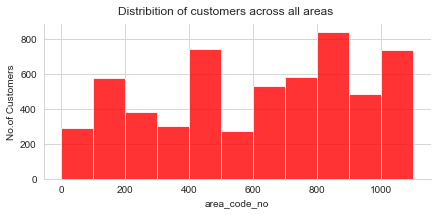

In [120]:
bins = np.arange(0,1200,100)
g=sns.FacetGrid(data=data, aspect = 2)
g.map(plt.hist,'area_code_no',bins=bins, color = 'r', alpha=0.8)
g.fig.suptitle('Distribition of customers across all areas') 
plt.subplots_adjust(top=0.9)
plt.ylabel("No.of Customers");

**we have less than 400 customers in areas (0 - 100, 300 - 400, 500 - 600)**

   - Need to do more marketing in these areas, since customer churn is the problem at hand, so we can spend time on exploratory data analysis for which particular areas need more marketing later on.

#### Feature Engineering of area_code_no

In [121]:
data['area_bin'] = pd.cut(x = data["area_code_no"],
                          bins = [0,100,200,300,400,500,600,700,800,900,1000,1200],
                          labels = ['area_1','area_2', 'area_3', 'area_4', 'area_5', 'area_6', 'area_7',
                                    'area_8', 'area_9', 'area_10', 'area_11'])  

In [122]:
# Extracting number from area_code column and creating new variable.

a_c = test['area_code']

a,c = zip(*(s.split("_") for s in a_c))

test['area_code_no'] = c

In [123]:
test['area_code_no'] = test['area_code_no'].astype('int64')

In [124]:
test['area_bin'] = pd.cut(x = test["area_code_no"],
                          bins = [0,100,200,300,400,500,600,700,800,900,1000,1200],
                          labels = ['area_1','area_2', 'area_3', 'area_4', 'area_5', 'area_6', 'area_7',
                                    'area_8', 'area_9', 'area_10', 'area_11']) 

#### Visualization of distribution of customers as per area_bin

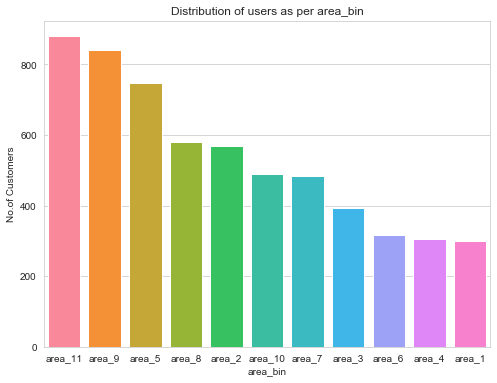

In [125]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'area_bin', data = data, order = data['area_bin'].value_counts().index, saturation = 1).set_title('Distribution of users as per area_bin');
plt.ylabel("No.of Customers");

#### Visualization of Outage_duration as per area_bin

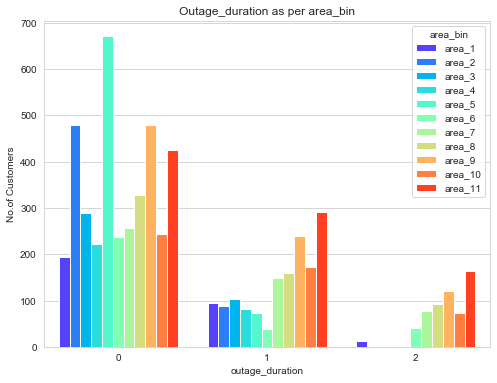

In [126]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'outage_duration', hue = 'area_bin', data = data, palette = 'rainbow', saturation = 1).set_title('Outage_duration as per area_bin');
plt.ylabel("No.of Customers");

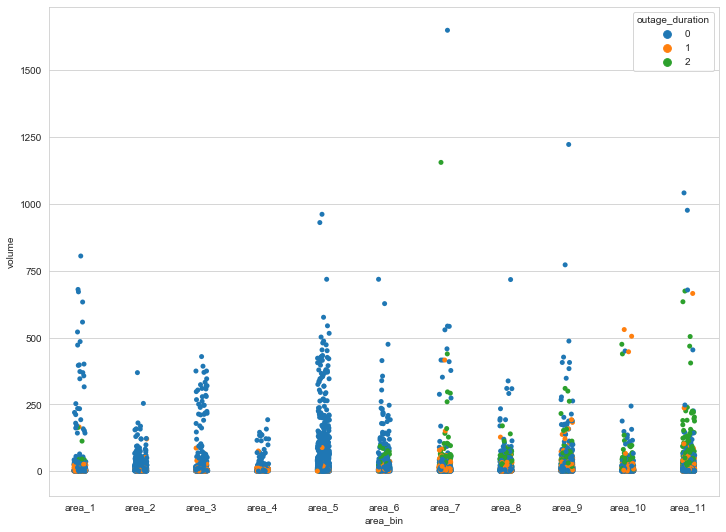

In [127]:
f,ax=plt.subplots(figsize=(12,9))
g=sns.stripplot(x = 'area_bin', y = 'volume', hue='outage_duration',data = data);

#### Visualization of outage_type

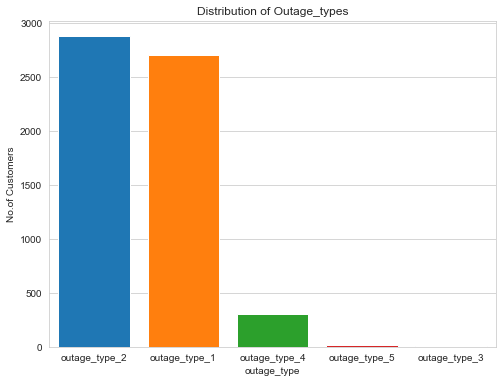

In [128]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'outage_type', data = data, order = data['outage_type'].value_counts().index, saturation = 1).set_title('Distribution of Outage_types');
plt.ylabel("No.of Customers");

**5800+ of our total customers are facing outage_type_1, outage_type_2 & outage_type_4**

####  Visualization of outage_type with outage_duration

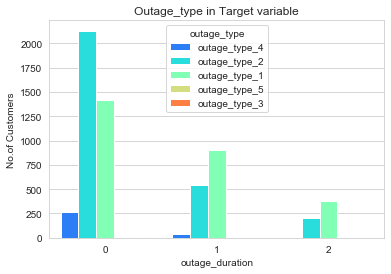

In [129]:
sns.countplot(x = 'outage_duration', hue = 'outage_type', data = data, palette = 'rainbow', saturation = 1).set_title('Outage_type in Target variable');
plt.ylabel("No.of Customers");

#### Feature Engineering of outage_type

In [130]:
map_outage_type = {"outage_type_2":'outage_1', "outage_type_1":'outage_1', 
               
                   "outage_type_4":'outage_2', 
                   
                   "outage_type_5":'outage_3', "outage_type_3":'outage_3'}

for records in data:
    data['outage_type_map']= data['outage_type'].map(map_outage_type)

In [131]:
map_outage_type = {"outage_type_2":'outage_1',  "outage_type_1":'outage_1',
               
                   "outage_type_4":'outage_2',
               
                   "outage_type_5":'outage_3', "outage_type_3":'outage_3'}

for records in test:
    test['outage_type_map']= test['outage_type'].map(map_outage_type)

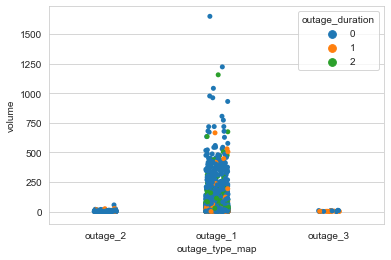

In [132]:
g=sns.stripplot(x = 'outage_type_map', y = 'volume', hue='outage_duration',data = data);

#### Visualization of volume_per_id 

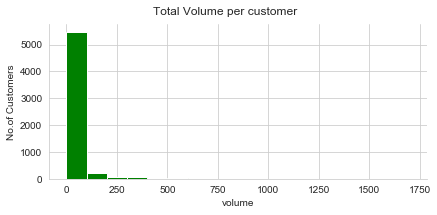

In [133]:
bins = np.arange(0,1800,100)                               
g = sns.FacetGrid(data = data, aspect = 2)
g.map(plt.hist,'volume', bins = bins, color = 'green')
g.fig.suptitle('Total Volume per customer') 
plt.subplots_adjust(top=0.9)
plt.ylabel("No.of Customers");

#### Visualization of log_per_id

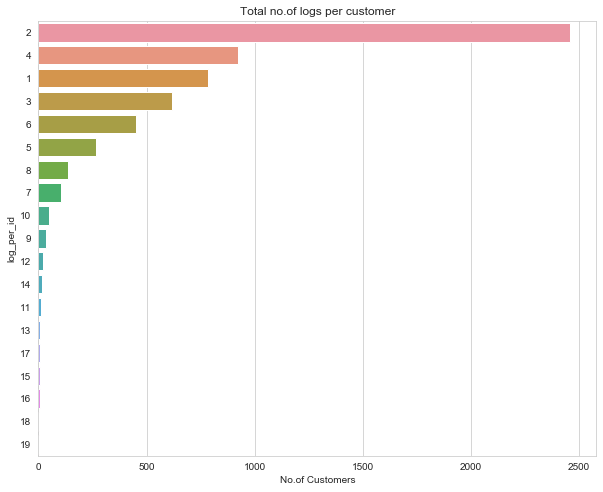

In [134]:
plt.figure(figsize=(10,8))
sns.countplot(y = 'log_per_id', data = data, order = data['log_per_id'].value_counts().index).set_title('Total no.of logs per customer')
plt.xlabel("No.of Customers");

#### Visualization of log_report_type

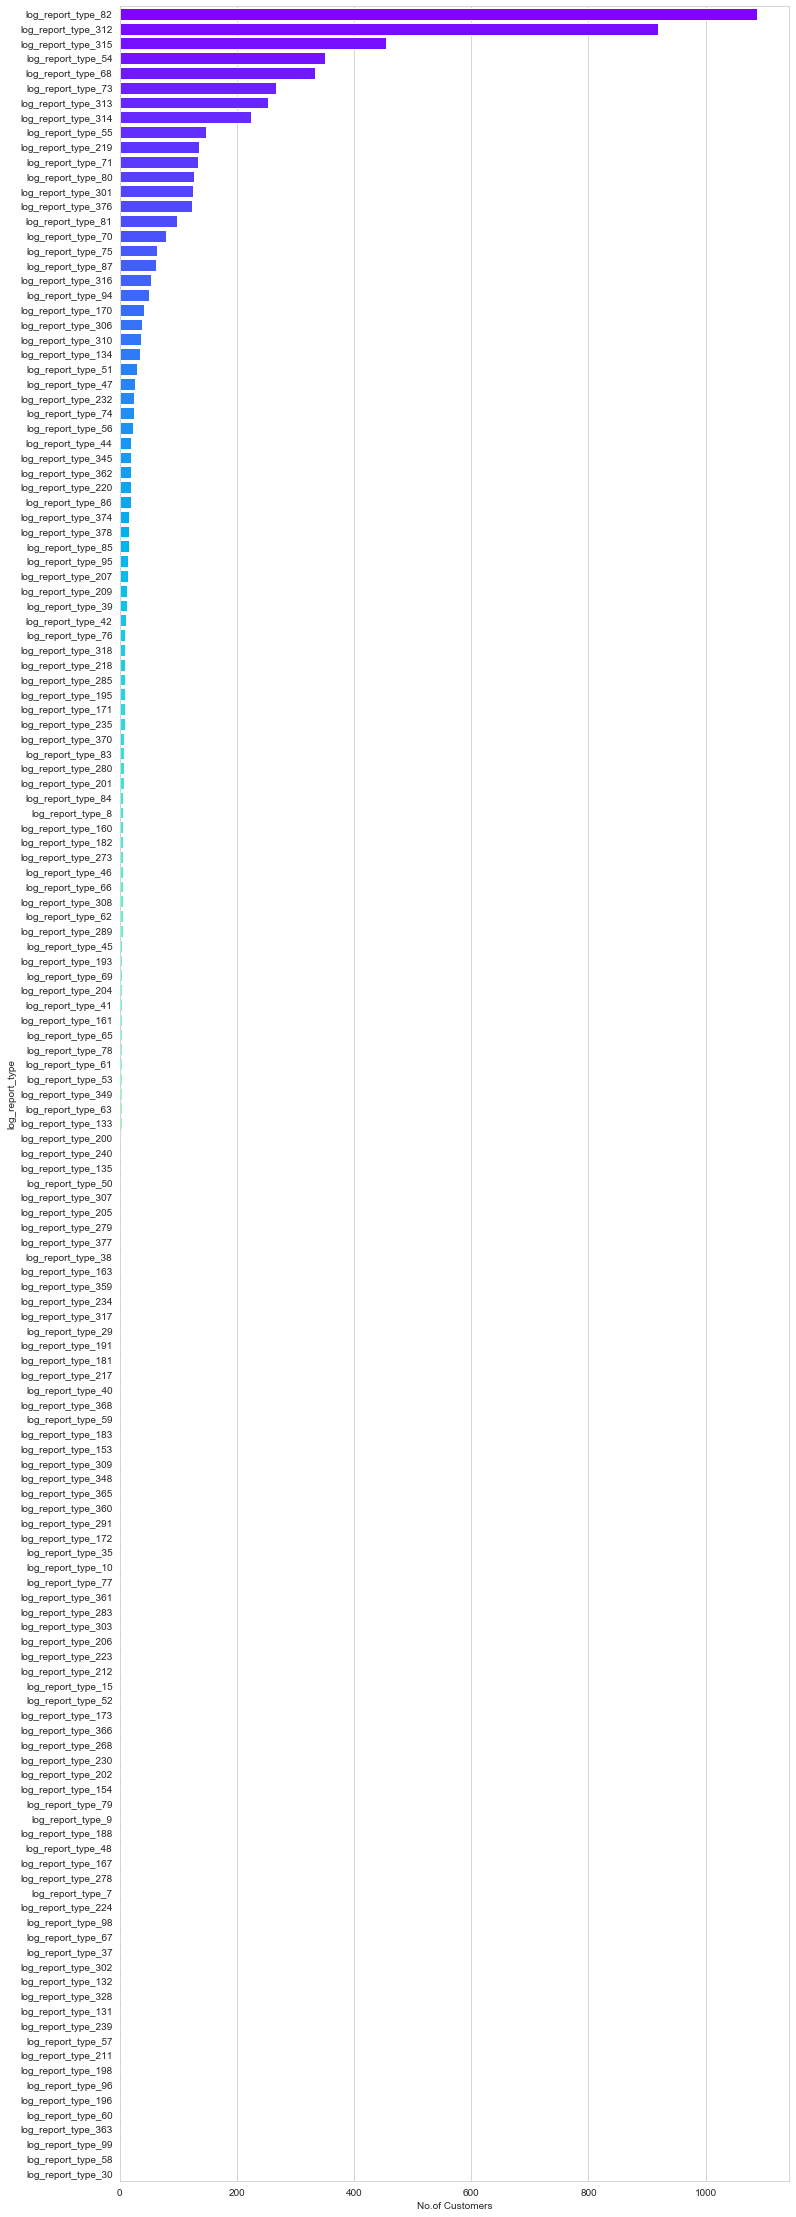

In [135]:
fig,ax = plt.subplots(figsize = (12,40));
sns.countplot(y = 'log_report_type', data = data, order = data['log_report_type'].value_counts().index, palette='rainbow',saturation=1);
plt.xlabel("No.of Customers");

**Let us examine volume per log_report_type**

In [136]:
data.log_report_type.value_counts() * 100 / len(data)

log_report_type_82     18.428184
log_report_type_312    15.565718
log_report_type_315    7.689702 
log_report_type_54     5.928184 
log_report_type_68     5.657182 
                         ...    
log_report_type_60     0.016938 
log_report_type_363    0.016938 
log_report_type_99     0.016938 
log_report_type_58     0.016938 
log_report_type_30     0.016938 
Name: log_report_type, Length: 147, dtype: float64

In [137]:
test.log_report_type.value_counts() * 100 / len(test)

log_report_type_82     18.821936
log_report_type_312    15.504401
log_report_type_315    7.650643 
log_report_type_54     6.567366 
log_report_type_68     4.536222 
                         ...    
log_report_type_217    0.067705 
log_report_type_38     0.067705 
log_report_type_375    0.067705 
log_report_type_279    0.067705 
log_report_type_307    0.067705 
Name: log_report_type, Length: 86, dtype: float64

### Feature engineering of log_report_type

In [138]:
 map_log_report_data = {"log_report_type_82":'log_report_1',
                  
                         "log_report_type_312":'log_report_2',
                  
                         "log_report_type_315":'log_report_3',
                         
                         "log_report_type_54":'log_report_4', "log_report_type_68":'log_report_4',
                         
                         "log_report_type_73":'log_report_5', "log_report_type_313":'log_report_5', "log_report_type_314":'log_report_5'}
    
for dataset in data:
    data['log_report'] = data['log_report_type'].map(map_log_report_data)
                   

In [139]:
 map_log_report_test = {"log_report_type_82":'log_report_1',
                  
                         "log_report_type_312":'log_report_2',
                  
                         "log_report_type_315":'log_report_3',
                         
                         "log_report_type_54":'log_report_4', "log_report_type_68":'log_report_4',
                         
                         "log_report_type_73":'log_report_5', "log_report_type_313":'log_report_5', "log_report_type_314":'log_report_5'}
for dataset in test:
    test['log_report'] = test['log_report_type'].map(map_log_report_test)
                   

In [140]:
data.isnull().sum()

id                     0   
area_code              0   
outage_duration        0   
outage_type            0   
volume                 0   
log_per_id             0   
log_report_type        0   
server_per_id          0   
transit_server_type    0   
broadband_per_id       0   
broadband_type         0   
area_code_no           0   
area_bin               0   
outage_type_map        0   
log_report             2013
dtype: int64

In [141]:
test.isnull().sum()

id                     0  
area_code              0  
outage_type            0  
volume                 0  
log_per_id             0  
log_report_type        0  
server_per_id          0  
transit_server_type    0  
broadband_per_id       0  
broadband_type         0  
area_code_no           0  
area_bin               0  
outage_type_map        0  
log_report             512
dtype: int64

In [142]:
data['log_report'] = data['log_report'].replace(np.nan, 'log_report_6')

In [143]:
test['log_report'] = test['log_report'].replace(np.nan, 'log_report_6')

In [144]:
data.isnull().sum()

id                     0
area_code              0
outage_duration        0
outage_type            0
volume                 0
log_per_id             0
log_report_type        0
server_per_id          0
transit_server_type    0
broadband_per_id       0
broadband_type         0
area_code_no           0
area_bin               0
outage_type_map        0
log_report             0
dtype: int64

In [145]:
test.isnull().sum()

id                     0
area_code              0
outage_type            0
volume                 0
log_per_id             0
log_report_type        0
server_per_id          0
transit_server_type    0
broadband_per_id       0
broadband_type         0
area_code_no           0
area_bin               0
outage_type_map        0
log_report             0
dtype: int64

#### Visualization of log_report

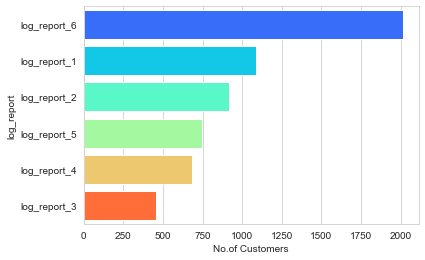

In [146]:
fig,ax = plt.subplots(figsize = (6,4));
sns.countplot(y = 'log_report', data = data, order = data['log_report'].value_counts().index, palette='rainbow',saturation=1);
plt.xlabel("No.of Customers");

#### Visualization of Target variable based on log_report

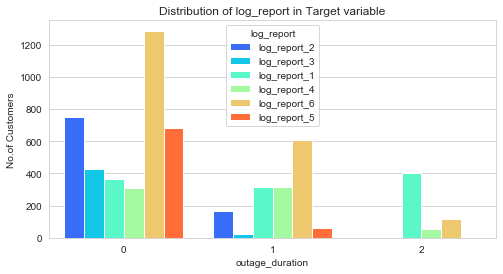

In [147]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'outage_duration', hue = 'log_report', data = data, palette = 'rainbow', saturation = 1).set_title('Distribution of log_report in Target variable');
plt.ylabel("No.of Customers");

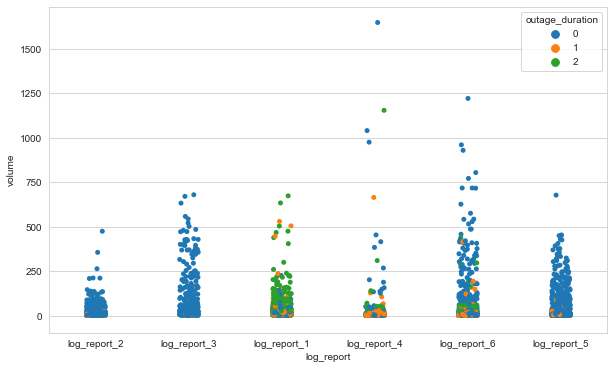

In [148]:
plt.figure(figsize=(10,6))
g = sns.stripplot(x = 'log_report', y = 'volume', hue='outage_duration',data = data);

#### Visualizing distribution frequency of transit_server_type

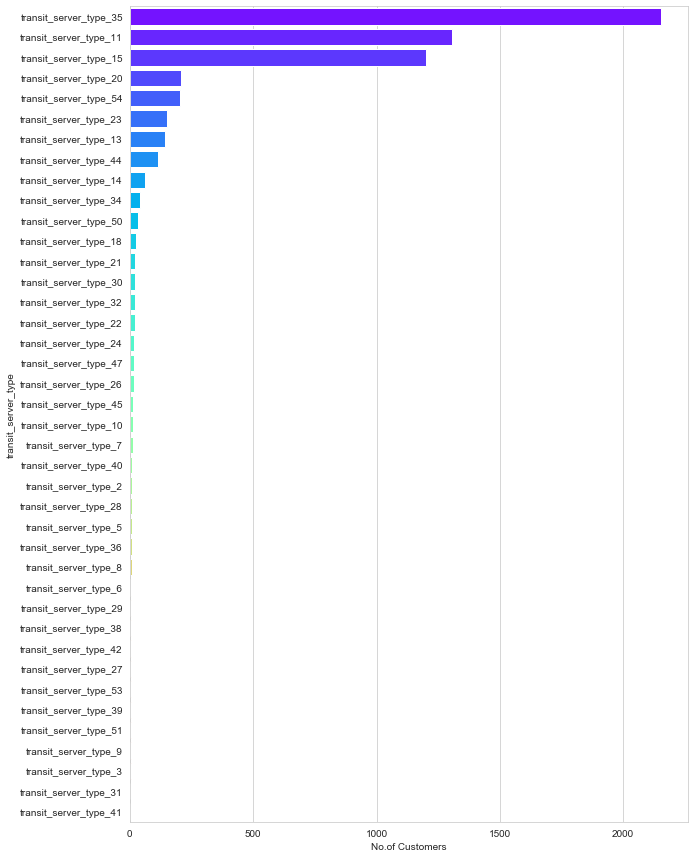

In [149]:
fig,ax=plt.subplots(figsize=(10,15));
sns.countplot(y='transit_server_type',data=data, order = data['transit_server_type'].value_counts().index, palette='rainbow',saturation=1);
ax.set_yticklabels(ax.get_yticklabels());
plt.xlabel("No.of Customers");

In [150]:
data.groupby('transit_server_type')['id'].agg('count').sort_values(ascending = False)

transit_server_type
transit_server_type_35    2154
transit_server_type_11    1306
transit_server_type_15    1200
transit_server_type_20    207 
transit_server_type_54    202 
transit_server_type_23    151 
transit_server_type_13    141 
transit_server_type_44    113 
transit_server_type_14    60  
transit_server_type_34    42  
transit_server_type_50    33  
transit_server_type_18    26  
transit_server_type_21    23  
transit_server_type_30    23  
transit_server_type_32    19  
transit_server_type_22    19  
transit_server_type_24    17  
transit_server_type_26    17  
transit_server_type_47    17  
transit_server_type_10    14  
transit_server_type_45    14  
transit_server_type_7     12  
transit_server_type_40    10  
transit_server_type_2     9   
transit_server_type_28    8   
transit_server_type_5     8   
transit_server_type_8     7   
transit_server_type_36    7   
transit_server_type_29    6   
transit_server_type_6     6   
transit_server_type_38    5   
transit_server_type

**transit_server_type 35, 11 & 15 has recorded the highest no.of incoming and outgoing web traffic.**

In [151]:
map_transit_data = {"transit_server_type_35":'transit_1', 
                
                    "transit_server_type_11":'transit_2', "transit_server_type_15":'transit_2',
                
                    "transit_server_type_20":'transit_3', "transit_server_type_54":'transit_3',
                
                    "transit_server_type_23":'transit_3', "transit_server_type_13":'transit_3', "transit_server_type_44":'transit_3'}

for dataset in data:
    data['transit'] = data['transit_server_type'].map(map_transit_data)
               

In [152]:
map_transit_test = {"transit_server_type_35":'transit_1', 
                
                    "transit_server_type_11":'transit_2', "transit_server_type_15":'transit_2',
                
                    "transit_server_type_20":'transit_3', "transit_server_type_54":'transit_3',
                
                    "transit_server_type_23":'transit_3', "transit_server_type_13":'transit_3', "transit_server_type_44":'transit_3'}

for dataset in test:
    test['transit'] = test['transit_server_type'].map(map_transit_test)
               

In [153]:
data.isnull().sum()

id                     0  
area_code              0  
outage_duration        0  
outage_type            0  
volume                 0  
log_per_id             0  
log_report_type        0  
server_per_id          0  
transit_server_type    0  
broadband_per_id       0  
broadband_type         0  
area_code_no           0  
area_bin               0  
outage_type_map        0  
log_report             0  
transit                430
dtype: int64

In [154]:
test.isnull().sum()

id                     0  
area_code              0  
outage_type            0  
volume                 0  
log_per_id             0  
log_report_type        0  
server_per_id          0  
transit_server_type    0  
broadband_per_id       0  
broadband_type         0  
area_code_no           0  
area_bin               0  
outage_type_map        0  
log_report             0  
transit                116
dtype: int64

In [155]:
data['transit'] = data['transit'].replace(np.nan, 'transit_4')

In [156]:
test['transit'] = test['transit'].replace(np.nan, 'transit_4')

In [157]:
data.isnull().sum()

id                     0
area_code              0
outage_duration        0
outage_type            0
volume                 0
log_per_id             0
log_report_type        0
server_per_id          0
transit_server_type    0
broadband_per_id       0
broadband_type         0
area_code_no           0
area_bin               0
outage_type_map        0
log_report             0
transit                0
dtype: int64

In [158]:
test.isnull().sum()

id                     0
area_code              0
outage_type            0
volume                 0
log_per_id             0
log_report_type        0
server_per_id          0
transit_server_type    0
broadband_per_id       0
broadband_type         0
area_code_no           0
area_bin               0
outage_type_map        0
log_report             0
transit                0
dtype: int64

#### Visualization of transit

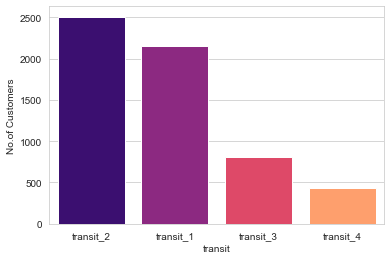

In [159]:
sns.countplot(x='transit',data=data, order = data['transit'].value_counts().index, palette='magma',saturation=1);
ax.set_yticklabels(ax.get_xticklabels());
plt.ylabel("No.of Customers");

#### Visualization of Target variable based on transit

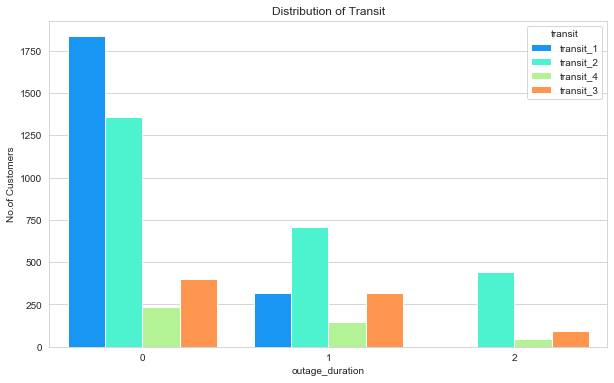

In [160]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'outage_duration', hue = 'transit', data = data, palette = 'rainbow', saturation = 1).set_title('Distribution of Transit');
plt.ylabel("No.of Customers");

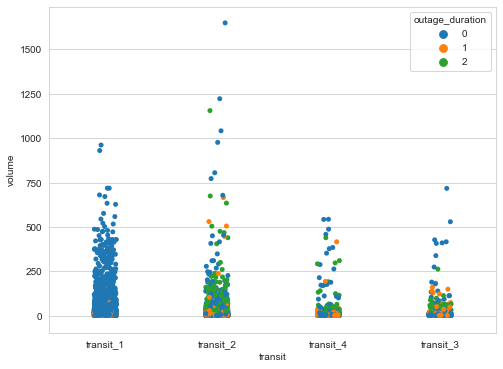

In [161]:
plt.figure(figsize=(8,6))
g = sns.stripplot(x = 'transit', y = 'volume', hue='outage_duration',data = data);

#### Visualization of broadband

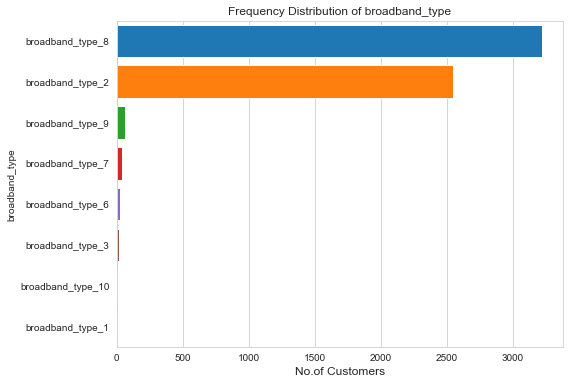

In [162]:
plt.figure(figsize=(8,6))
sns.countplot(y = 'broadband_type',data = data, order = data['broadband_type'].value_counts().index, saturation = 1);
plt.title('Frequency Distribution of broadband_type')
plt.xlabel('No.of Customers', fontsize=12)
plt.show()

**The term broadband commonly refers to high-speed Internet access that is always on and faster than the traditional dial-up access.**

**The different broadband_type’s are given below:**
 
 broadband_type_8 : 'ADSL 1',

 broadband_type_2 : 'ADSL 2',
 
 broadband_type_6 : 'ADSL 2+',
 
 broadband_type_7 : 'Cable',
 
 broadband_type_4 : 'Fiber 1',
 
 broadband_type_9 : 'BPL',
 
 broadband_type_3 : 'Fiber 2',
 
 broadband_type_10 : 'Fiber High Speed',
 
 broadband_type_1 : 'Fiber Ultra',
 
 broadband_type_5 : 'Fiber Ultra Max'
 

- broadband_type_8 and broadband_type_2 are the two most common broadband type preferred by the customers,
  since they are used by almost 97% of our customers.

#### Visualization of Target variable based on broadband_type

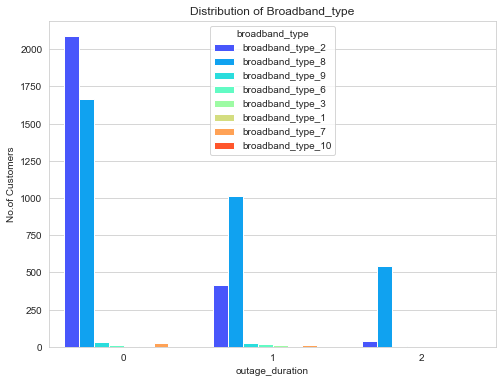

In [163]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'outage_duration', hue = 'broadband_type', data = data, palette = 'rainbow', saturation = 1).set_title('Distribution of Broadband_type');
plt.ylabel("No.of Customers");

**Lets check which broadband_type is most commonly preferred by the customers**

In [164]:
data.broadband_type.value_counts() * 100 / len(data)  

broadband_type_8     54.488482
broadband_type_2     43.055556
broadband_type_9     1.033198 
broadband_type_7     0.660569 
broadband_type_6     0.423442 
broadband_type_3     0.287940 
broadband_type_10    0.033875 
broadband_type_1     0.016938 
Name: broadband_type, dtype: float64

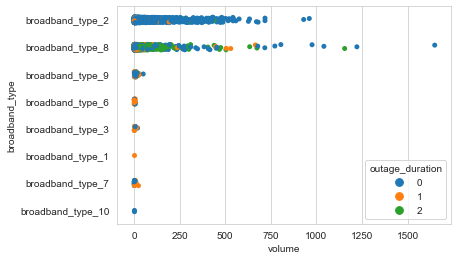

In [165]:
g = sns.stripplot(y = 'broadband_type', x = 'volume', hue='outage_duration',data = data);

#### Feature engineering of Broadband data

In [166]:
map_broadband_data = {"broadband_type_8":'broadband_1', "broadband_type_2":'broadband_1',
                  
                  "broadband_type_9":'broadband_2',"broadband_type_7":'broadband_2',
                  "broadband_type_6":'broadband_2',"broadband_type_3":'broadband_2',
                  "broadband_type_10":'broadband_2',"broadband_type_1":'broadband_2'}

for dataset in data:
    data['broadband'] = data['broadband_type'].map(map_broadband_data)

In [167]:
map_broadband_test = {"broadband_type_8":'broadband_1', "broadband_type_2":'broadband_1',
            
                  "broadband_type_9":'broadband_2',"broadband_type_7":'broadband_2',
                  "broadband_type_6":'broadband_2',"broadband_type_3":'broadband_2',
                  "broadband_type_10":'broadband_2',"broadband_type_1":'broadband_2'}

for dataset in test:
    test['broadband'] = test['broadband_type'].map(map_broadband_test)

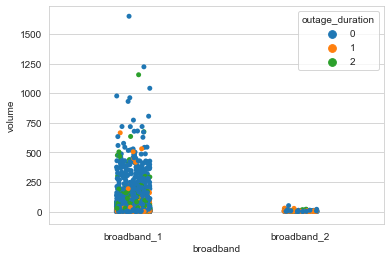

In [168]:
g = sns.stripplot(x = 'broadband', y = 'volume', hue='outage_duration',data = data);

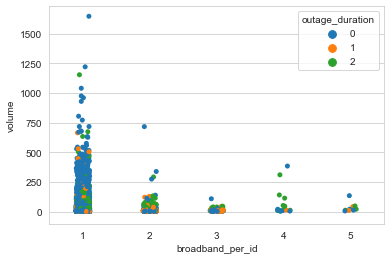

In [169]:
g = sns.stripplot(x = 'broadband_per_id', y = 'volume', hue='outage_duration',data = data);

#### Visualization of broadband_per_id_

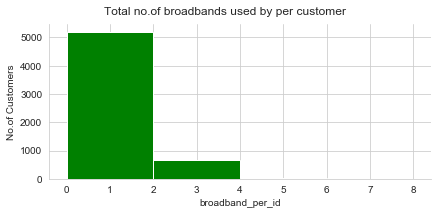

In [170]:
bins = np.arange(0,10,2)
g = sns.FacetGrid(data = data, aspect = 2)
g.map(plt.hist,'broadband_per_id', bins = bins, color = 'green')
g.fig.suptitle('Total no.of broadbands used by per customer') 
plt.subplots_adjust(top=0.9)
plt.ylabel("No.of Customers");

**we will convert our target variable  'outage_duration' into category.**

In [171]:
data['outage_duration'] = data['outage_duration'].astype('category')

In [172]:
data.groupby('outage_duration').area_code.agg('count')

outage_duration
0    3827
1    1496
2    581 
Name: area_code, dtype: int64

In [173]:
data.outage_duration.value_counts() * 100 / len(data)

0    64.820461
1    25.338753
2    9.840786 
Name: outage_duration, dtype: float64

#### Visualization of Target variable - 'outage duration'.

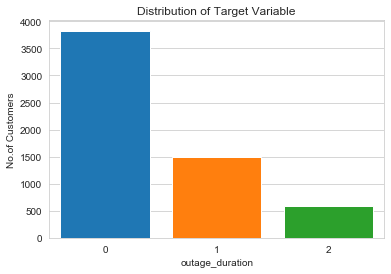

In [174]:
sns.countplot(x = 'outage_duration',data = data, order = data['outage_duration'].value_counts().index, saturation = 1).set_title('Distribution of Target Variable')
plt.ylabel("No.of Customers");

**Our 'India Broadband' company have tracked three different outage durations as shown below :**

   **0 -  for no outage**

   **1 - for short outages that last anywhere between a few minutes and a maximum of 2 hours**
        
   **2 - for long outages that can last from 2 hours to sometimes even a couple of days.**

**Since our company is now seeing a lot of customer churn due to customer dissatisfaction because of broadband outages.**

#### Visualizing each category of outage_duration in all areas

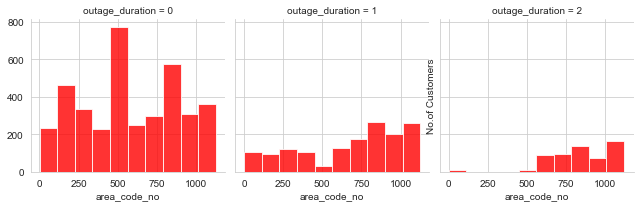

In [175]:
g = sns.FacetGrid(data = data, col = 'outage_duration');
g.map(plt.hist,'area_code_no', color = 'r', alpha = 0.8)
plt.ylabel("No.of Customers");

**Lets check the long outages (outage_duration = 2) in our data**

In [176]:
data[data.outage_duration == 2]      # verifying

,id,area_code,outage_duration,outage_type,volume,log_per_id,log_report_type,server_per_id,transit_server_type,broadband_per_id,broadband_type,area_code_no,area_bin,outage_type_map,log_report,transit,broadband
4,4555,area_600,2,outage_type_2,44,2,log_report_type_82,1,transit_server_type_15,1,broadband_type_8,600,area_6,outage_1,log_report_1,transit_2,broadband_1
16,1373,area_962,2,outage_type_1,36,4,log_report_type_82,2,transit_server_type_15,1,broadband_type_8,962,area_10,outage_1,log_report_1,transit_2,broadband_1
24,4209,area_1086,2,outage_type_2,31,2,log_report_type_82,1,transit_server_type_15,1,broadband_type_8,1086,area_11,outage_1,log_report_1,transit_2,broadband_1
32,8984,area_976,2,outage_type_2,68,2,log_report_type_82,1,transit_server_type_15,1,broadband_type_8,976,area_10,outage_1,log_report_1,transit_2,broadband_1
34,14361,area_704,2,outage_type_1,42,4,log_report_type_82,2,transit_server_type_15,1,broadband_type_8,704,area_8,outage_1,log_report_1,transit_2,broadband_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,6788,area_926,2,outage_type_1,48,5,log_report_type_239,2,transit_server_type_24,2,broadband_type_8,926,area_10,outage_1,log_report_6,transit_4,broadband_1
5881,2903,area_1086,2,outage_type_2,28,2,log_report_type_82,1,transit_server_type_15,1,broadband_type_8,1086,area_11,outage_1,log_report_1,transit_2,broadband_1
5886,15977,area_866,2,outage_type_1,31,5,log_report_type_209,1,transit_server_type_11,1,broadband_type_8,866,area_9,outage_1,log_report_6,transit_2,broadband_1
5895,14082,area_962,2,outage_type_2,82,2,log_report_type_82,1,transit_server_type_15,1,broadband_type_8,962,area_10,outage_1,log_report_1,transit_2,broadband_1


In [177]:
long_outage = data[data.outage_duration == 2]      

In [178]:
long_outage.shape

(581, 17)

In [179]:
long_outage.head()

,id,area_code,outage_duration,outage_type,volume,log_per_id,log_report_type,server_per_id,transit_server_type,broadband_per_id,broadband_type,area_code_no,area_bin,outage_type_map,log_report,transit,broadband
4,4555,area_600,2,outage_type_2,44,2,log_report_type_82,1,transit_server_type_15,1,broadband_type_8,600,area_6,outage_1,log_report_1,transit_2,broadband_1
16,1373,area_962,2,outage_type_1,36,4,log_report_type_82,2,transit_server_type_15,1,broadband_type_8,962,area_10,outage_1,log_report_1,transit_2,broadband_1
24,4209,area_1086,2,outage_type_2,31,2,log_report_type_82,1,transit_server_type_15,1,broadband_type_8,1086,area_11,outage_1,log_report_1,transit_2,broadband_1
32,8984,area_976,2,outage_type_2,68,2,log_report_type_82,1,transit_server_type_15,1,broadband_type_8,976,area_10,outage_1,log_report_1,transit_2,broadband_1
34,14361,area_704,2,outage_type_1,42,4,log_report_type_82,2,transit_server_type_15,1,broadband_type_8,704,area_8,outage_1,log_report_1,transit_2,broadband_1


In [180]:
long_outage.describe().T

,count,mean,std,min,25%,50%,75%,max
id,581.0,9326.320138,5335.583636,68.0,4904.0,9328.0,13754.0,18528.0
volume,581.0,53.571429,85.459491,1.0,16.0,32.0,58.0,1155.0
log_per_id,581.0,3.537005,1.931791,1.0,2.0,3.0,4.0,15.0
server_per_id,581.0,1.740103,0.942992,1.0,1.0,2.0,2.0,9.0
broadband_per_id,581.0,1.204819,0.593973,1.0,1.0,1.0,1.0,5.0
area_code_no,581.0,844.450947,204.126633,1.0,704.0,844.0,1019.0,1119.0


#### Visualizing areas having Long outages

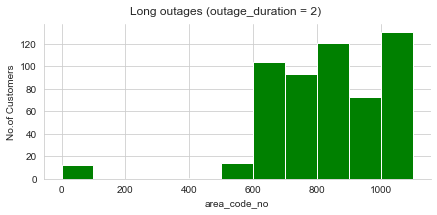

In [181]:
bins = np.arange(0,1200,100)
g = sns.FacetGrid(data = long_outage, aspect = 2)
g.map(plt.hist,'area_code_no',bins = bins, color = 'g')
g.fig.suptitle('Long outages (outage_duration = 2)') 
plt.subplots_adjust(top = 0.9)
plt.ylabel("No.of Customers");

**If our company focuses on providing optimal services in these particular areas (600 - 1100) as we can see in the long_outage visualization, they can easily retain these 10% of customers (approx. 500 customers) and can instead save enormous money on marketing.**

**Let us now check the no.of areas having long outages i.e, outage_duration = 2**

In [182]:
long_outage['area_code'].nunique()

135

**Lets see how many customers belong to long_outage area**

In [183]:
long_outage['id'].nunique()

581

**Our Company may lose close to 10% of its customers, if they fail to improve their boradband services in these 135 areas mentioned below.**

In [184]:
long_outage.area_code.unique()

array(['area_600', 'area_962', 'area_1086', 'area_976', 'area_704',
       'area_821', 'area_1024', 'area_734', 'area_648', 'area_1090',
       'area_995', 'area_1107', 'area_846', 'area_892', 'area_644',
       'area_810', 'area_895', 'area_834', 'area_684', 'area_599',
       'area_864', 'area_921', 'area_1109', 'area_909', 'area_1100',
       'area_1019', 'area_1052', 'area_613', 'area_931', 'area_897',
       'area_674', 'area_839', 'area_845', 'area_667', 'area_1008',
       'area_763', 'area_641', 'area_866', 'area_974', 'area_1098',
       'area_798', 'area_653', 'area_769', 'area_830', 'area_884',
       'area_540', 'area_925', 'area_638', 'area_535', 'area_643',
       'area_1061', 'area_937', 'area_1042', 'area_1026', 'area_867',
       'area_1103', 'area_967', 'area_957', 'area_984', 'area_794',
       'area_705', 'area_619', 'area_646', 'area_1051', 'area_724',
       'area_991', 'area_779', 'area_1014', 'area_1111', 'area_13',
       'area_816', 'area_1049', 'area_726', 'a

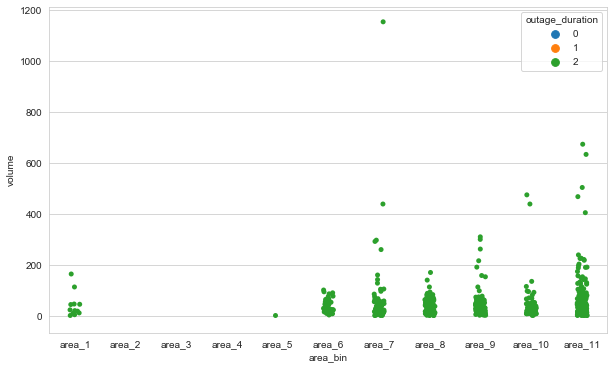

In [185]:
plt.figure(figsize=(10,6))
g = sns.stripplot(x = 'area_bin', y = 'volume', hue='outage_duration',data = long_outage);

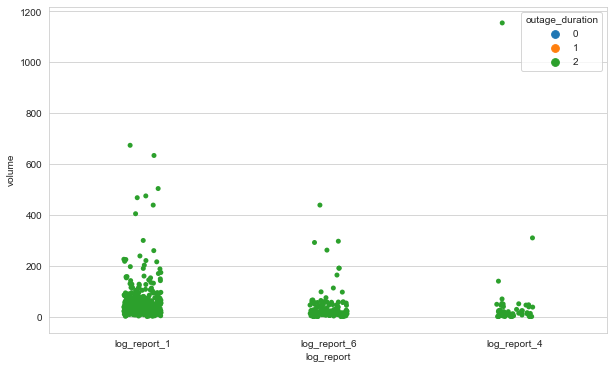

In [186]:
plt.figure(figsize=(10,6))
g = sns.stripplot(x = 'log_report', y = 'volume', hue='outage_duration',data = long_outage);

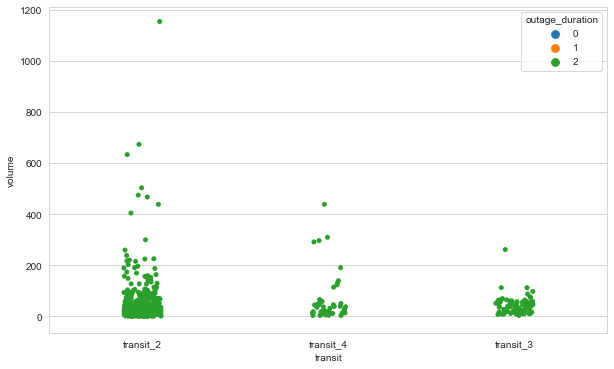

In [187]:
plt.figure(figsize=(10,6))
g = sns.stripplot(x = 'transit', y = 'volume', hue='outage_duration',data = long_outage);

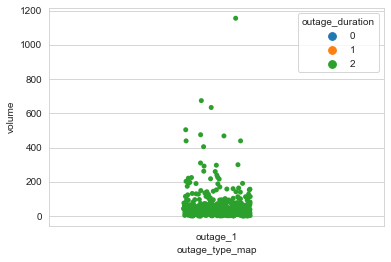

In [188]:
g = sns.stripplot(x = 'outage_type_map', y = 'volume', hue='outage_duration',data = long_outage);

#### Which broadband types are suspect of long outage durations?

In [189]:
long_outage.broadband_type.value_counts() * 100 / len(long_outage)  

broadband_type_8    92.943201
broadband_type_2    6.368330 
broadband_type_9    0.688468 
Name: broadband_type, dtype: float64

**Our company needs to replace  broadband_type_8 (ADSL 1) & broadband_type_2 (ADSL 2) as they are suspected for long outages in certain areas (600 - 1200) impacting more than 500 customers.**

**Visualization of broadband types that are suspected of long outage durations**

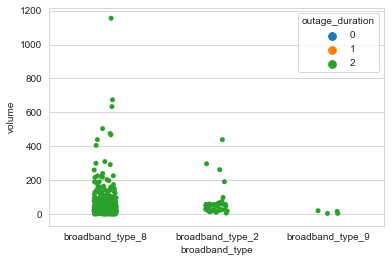

In [190]:
g = sns.stripplot(x = 'broadband_type', y = 'volume', hue='outage_duration',data = long_outage);

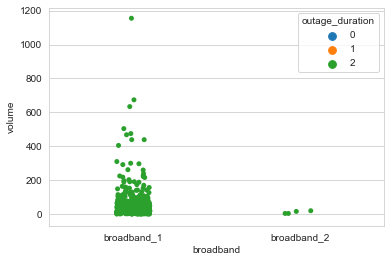

In [191]:
g = sns.stripplot(x = 'broadband', y = 'volume', hue='outage_duration',data = long_outage);

- In my opinion, Our compnay must prioritize in retaining 25% (approx. 1500) of our customers falling under the category of 'short outages' (outage_duration = 1) as customer satisfaction is equally important to retain the customers; Since high internet speed without interruption is the need for the hour.

- While finding new customers is important, if we are not focusing on retaining the customers we have,
  we’re missing out on the opportunity to make a lot more money. 
  
- Repeat customers often purchase/subscribe more, and as their loyalty grows, they become brand evangelists, sending new         customers our way.

 **Let us do a quick EDA on short outages**

In [192]:
short_outage = data[data.outage_duration == 1]      

In [193]:
short_outage.shape

(1496, 17)

In [194]:
short_outage.head()

,id,area_code,outage_duration,outage_type,volume,log_per_id,log_report_type,server_per_id,transit_server_type,broadband_per_id,broadband_type,area_code_no,area_bin,outage_type_map,log_report,transit,broadband
0,13366,area_415,1,outage_type_4,1,1,log_report_type_312,1,transit_server_type_35,1,broadband_type_2,415,area_5,outage_2,log_report_2,transit_1,broadband_1
2,9519,area_931,1,outage_type_2,11,3,log_report_type_82,1,transit_server_type_15,1,broadband_type_8,931,area_10,outage_1,log_report_1,transit_2,broadband_1
3,10202,area_700,1,outage_type_1,1,1,log_report_type_54,1,transit_server_type_11,1,broadband_type_8,700,area_7,outage_1,log_report_4,transit_2,broadband_1
7,8729,area_734,1,outage_type_1,39,5,log_report_type_82,2,transit_server_type_15,1,broadband_type_8,734,area_8,outage_1,log_report_1,transit_2,broadband_1
15,6047,area_445,1,outage_type_2,4,2,log_report_type_312,2,transit_server_type_35,1,broadband_type_2,445,area_5,outage_1,log_report_2,transit_1,broadband_1


In [195]:
short_outage.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1496.0,9231.075535,5282.781771,1.0,4812.5,9213.5,13641.75,18543.0
volume,1496.0,12.923797,34.670849,1.0,3.0,5.0,12.00,665.0
log_per_id,1496.0,3.004011,1.679301,1.0,2.0,2.0,4.00,13.0
server_per_id,1496.0,1.673797,0.770186,1.0,1.0,2.0,2.00,6.0
broadband_per_id,1496.0,1.229947,0.504759,1.0,1.0,1.0,1.00,5.0
area_code_no,1496.0,681.774064,327.109197,1.0,404.0,763.0,961.25,1125.0


**Lets see how many customers belong to short_outage area**

In [196]:
short_outage.id.nunique()

1496

**Let us now check the no.of areas having short outages i.e, outage_duration = 1**

In [197]:
short_outage.area_code_no.nunique()

507

 **Inorder to maintain 25% of these customers, Our company must engage in improving broadband services in 500 plus areas.**

#### Visualizing areas having Short outages

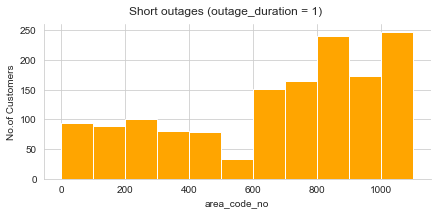

In [198]:
bins = np.arange(0,1200,100)
g = sns.FacetGrid(data = short_outage, aspect = 2)
g.map(plt.hist,'area_code_no',bins = bins, color = 'orange')
g.fig.suptitle('Short outages (outage_duration = 1)')
plt.subplots_adjust(top=0.9)
plt.ylabel("No.of Customers");

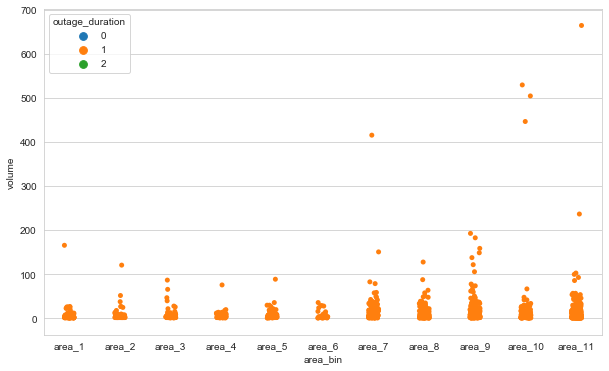

In [199]:
plt.figure(figsize=(10,6))
g = sns.stripplot(x = 'area_bin', y = 'volume', hue='outage_duration',data = short_outage);

**Which areas are most prone to Short outage durations?**

In [200]:
short_outage.area_code.unique()

array(['area_415', 'area_931', 'area_700', 'area_734', 'area_445',
       'area_846', 'area_737', 'area_1015', 'area_625', 'area_172',
       'area_320', 'area_976', 'area_1042', 'area_695', 'area_272',
       'area_429', 'area_653', 'area_648', 'area_831', 'area_883',
       'area_834', 'area_944', 'area_803', 'area_249', 'area_187',
       'area_821', 'area_1084', 'area_627', 'area_895', 'area_1033',
       'area_268', 'area_1056', 'area_570', 'area_797', 'area_388',
       'area_837', 'area_81', 'area_662', 'area_704', 'area_13',
       'area_1107', 'area_1054', 'area_684', 'area_135', 'area_298',
       'area_692', 'area_962', 'area_825', 'area_1103', 'area_599',
       'area_257', 'area_1', 'area_460', 'area_763', 'area_179',
       'area_864', 'area_915', 'area_446', 'area_826', 'area_239',
       'area_815', 'area_802', 'area_184', 'area_408', 'area_851',
       'area_393', 'area_744', 'area_286', 'area_691', 'area_560',
       'area_107', 'area_1086', 'area_641', 'area_885', 'a

**Visualization of broadband types that are suspected of short outage durations**

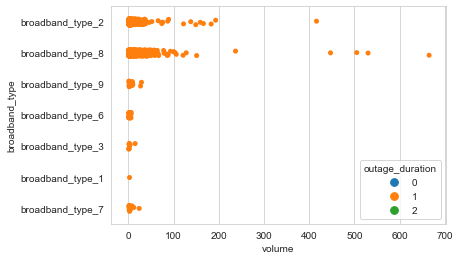

In [201]:
g = sns.stripplot(y = 'broadband_type', x = 'volume', hue='outage_duration',data = short_outage);

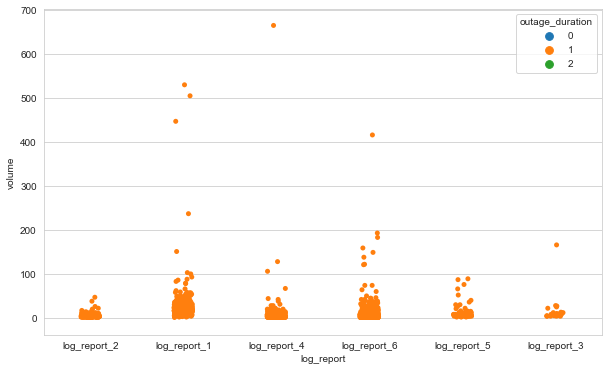

In [202]:
plt.figure(figsize=(10,6))
g = sns.stripplot(x = 'log_report', y = 'volume', hue='outage_duration',data = short_outage);

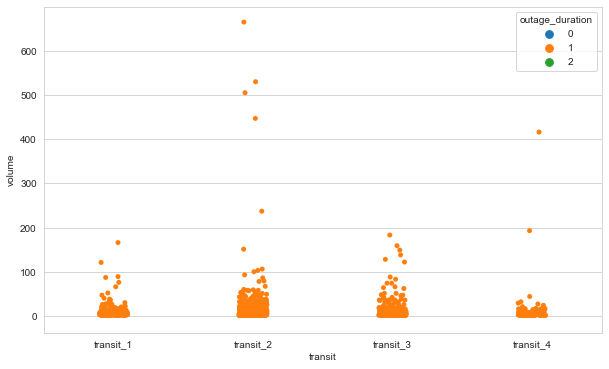

In [203]:
plt.figure(figsize=(10,6))
g = sns.stripplot(x = 'transit', y = 'volume', hue='outage_duration',data = short_outage);

In [204]:
data.groupby('outage_type').id.agg('count').sort_values(ascending = False)

outage_type
outage_type_2    2875
outage_type_1    2700
outage_type_4    306 
outage_type_5    19  
outage_type_3    4   
Name: id, dtype: int64

In [205]:
data.outage_type.value_counts() * 100 / len(data)

outage_type_2    48.695799
outage_type_1    45.731707
outage_type_4    5.182927 
outage_type_5    0.321816 
outage_type_3    0.067751 
Name: outage_type, dtype: float64

**More than 93% (5575 out of 5904) of customers have outage_type_2 & outage_type_1**

In [206]:
o_t_n = data['outage_type']

o,t,n = zip(*(s.split("_") for s in o_t_n))

data['outage_type_no'] = n

In [207]:
outage_type_1 = data[data.outage_type_no == '1']

In [208]:
outage_type_1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2700.0,9292.770000,5387.897469,1.0,4511.75,9326.0,13966.25,18550.0
volume,2700.0,28.907037,84.370765,1.0,3.00,7.0,22.00,1649.0
log_per_id,2700.0,3.157778,1.932425,1.0,2.00,2.0,4.00,15.0
server_per_id,2700.0,1.768889,0.889565,1.0,1.00,2.0,2.00,9.0
broadband_per_id,2700.0,1.253333,0.577046,1.0,1.00,1.0,1.00,5.0
area_code_no,2700.0,758.809630,287.299687,1.0,646.00,814.0,976.00,1126.0


#### Visualization of outage_type_1 across all areas

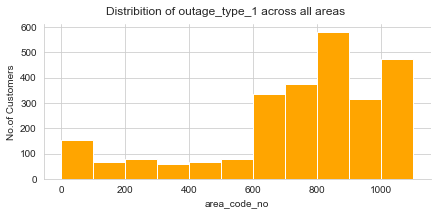

In [209]:
bins = np.arange(0,1200,100)
g = sns.FacetGrid(data = outage_type_1, aspect = 2)
g.map(plt.hist,'area_code_no', bins = bins, color = 'orange')
g.fig.suptitle('Distribition of outage_type_1 across all areas') 
plt.subplots_adjust(top=0.9)
plt.ylabel("No.of Customers");

**outage_type_1 occurs frequently in areas ranging from 600 - 1200.**

**2700 customers are affected due to outage_type_1**

In [210]:
outage_type_2 = data[data.outage_type_no == '2']

In [211]:
outage_type_2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2875.0,9343.652870,5304.774011,5.0,4957.0,9321.0,13865.0,18548.0
volume,2875.0,38.931130,81.795475,1.0,4.0,12.0,32.0,961.0
log_per_id,2875.0,3.444870,2.511630,1.0,2.0,2.0,4.0,19.0
server_per_id,2875.0,1.679652,0.518938,1.0,1.0,2.0,2.0,4.0
broadband_per_id,2875.0,1.052522,0.232284,1.0,1.0,1.0,1.0,3.0
area_code_no,2875.0,516.040348,301.832840,1.0,253.5,478.0,777.5,1117.0


#### Visualization of outage_type_2 across all areas

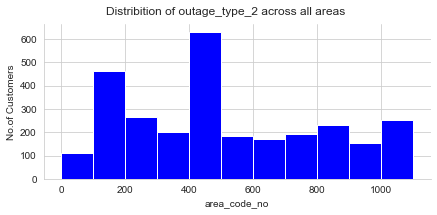

In [212]:
bins = np.arange(0,1200,100)
g = sns.FacetGrid(data = outage_type_2, aspect = 2)
g.map(plt.hist,'area_code_no', bins = bins, color = 'blue') 
g.fig.suptitle('Distribition of outage_type_2 across all areas') 
plt.subplots_adjust(top=0.9)
plt.ylabel("No.of Customers");

**outage_type_2 occurs across all areas but the frequency is comparatively high  in these particular areas (100 - 200 ) & (400 - 500).**

**Nearly 3000 of our customers are affected due to outage_type_2**

In [213]:
outage_type_4 = data[data.outage_type_no == '4']

In [214]:
outage_type_4.describe().T

,count,mean,std,min,25%,50%,75%,max
id,306.0,9238.767974,5224.164769,24.0,5139.75,9396.0,13557.25,18507.0
volume,306.0,3.150327,4.645140,1.0,1.00,2.0,3.00,56.0
log_per_id,306.0,1.712418,1.006036,1.0,1.00,1.0,2.00,8.0
server_per_id,306.0,1.094771,0.380903,1.0,1.00,1.0,1.00,4.0
broadband_per_id,306.0,1.042484,0.232222,1.0,1.00,1.0,1.00,3.0
area_code_no,306.0,447.892157,287.935475,5.0,212.75,398.0,643.00,1111.0


#### Visualization of outage_type_4 across all areas

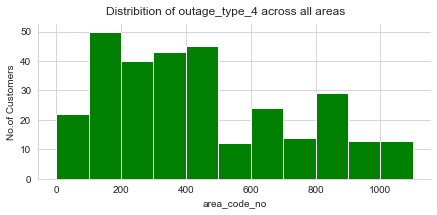

In [215]:
bins = np.arange(0,1200,100)
g = sns.FacetGrid(data = outage_type_4, aspect = 2)
g.map(plt.hist,'area_code_no', bins = bins, color = 'green') 
g.fig.suptitle('Distribition of outage_type_4 across all areas') 
plt.subplots_adjust(top=0.9)
plt.ylabel("No.of Customers");

**Around 300 no.of customers are affected due to outage_type_4**

In [216]:
data.set_index('id', inplace = True)

In [217]:
test.set_index('id', inplace = True)

In [218]:
data.dtypes

area_code              object  
outage_duration        category
outage_type            object  
volume                 int64   
log_per_id             int64   
log_report_type        object  
server_per_id          int64   
transit_server_type    object  
broadband_per_id       int64   
broadband_type         object  
area_code_no           int64   
area_bin               category
outage_type_map        object  
log_report             object  
transit                object  
broadband              object  
outage_type_no         object  
dtype: object

In [219]:
test.dtypes

area_code              object  
outage_type            object  
volume                 int64   
log_per_id             int64   
log_report_type        object  
server_per_id          int64   
transit_server_type    object  
broadband_per_id       int64   
broadband_type         object  
area_code_no           int64   
area_bin               category
outage_type_map        object  
log_report             object  
transit                object  
broadband              object  
dtype: object

In [220]:
data.columns

Index(['area_code', 'outage_duration', 'outage_type', 'volume', 'log_per_id',
       'log_report_type', 'server_per_id', 'transit_server_type',
       'broadband_per_id', 'broadband_type', 'area_code_no', 'area_bin',
       'outage_type_map', 'log_report', 'transit', 'broadband',
       'outage_type_no'],
      dtype='object')

In [221]:
test.columns

Index(['area_code', 'outage_type', 'volume', 'log_per_id', 'log_report_type',
       'server_per_id', 'transit_server_type', 'broadband_per_id',
       'broadband_type', 'area_code_no', 'area_bin', 'outage_type_map',
       'log_report', 'transit', 'broadband'],
      dtype='object')

In [222]:
data.drop(['area_code', 'area_code_no', 'broadband_type','outage_type','transit_server_type','log_report_type','outage_type_no'], 
            axis = 1, inplace = True)

In [223]:
test.drop(['area_code', 'area_code_no', 'broadband_type','outage_type','transit_server_type','log_report_type'], 
            axis = 1, inplace = True)

In [224]:
data.shape

(5904, 10)

In [225]:
test.shape

(1477, 9)

In [226]:
data.columns

Index(['outage_duration', 'volume', 'log_per_id', 'server_per_id',
       'broadband_per_id', 'area_bin', 'outage_type_map', 'log_report',
       'transit', 'broadband'],
      dtype='object')

In [227]:
def areahavinglongoutage(a):
    if a in ('area_1','area_6','area_7','area_8', 'area_9', 'area_10', 'area_11'):
        return 1
    if a in ('area_2','area_3', 'area_4', 'area_5'):
        return 0

data['area_longoutage'] = data.area_bin.map(areahavinglongoutage)

In [228]:
def areahavinglongoutage(a):
    if a in ('area_1', 'area_6','area_7','area_8', 'area_9', 'area_10', 'area_11'):
        return 1
    if a in ('area_2','area_3', 'area_4', 'area_5'):
        return 0

test['area_longoutage'] = test.area_bin.map(areahavinglongoutage)

In [229]:
data['area_longoutage'] = data['area_longoutage'].astype('category')

In [230]:
test['area_longoutage'] = test['area_longoutage'].astype('category')

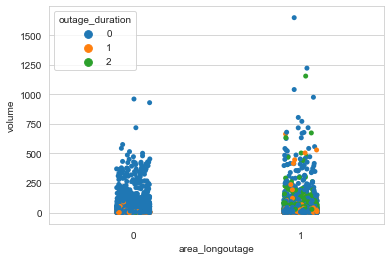

In [231]:
g = sns.stripplot(x = 'area_longoutage', y = 'volume', hue='outage_duration',data = data);

In [232]:
cat_cols = ['area_bin', 'outage_type_map', 'log_report', 'transit', 'broadband', 'area_longoutage' ]

**Visualization of Numerical attributes**

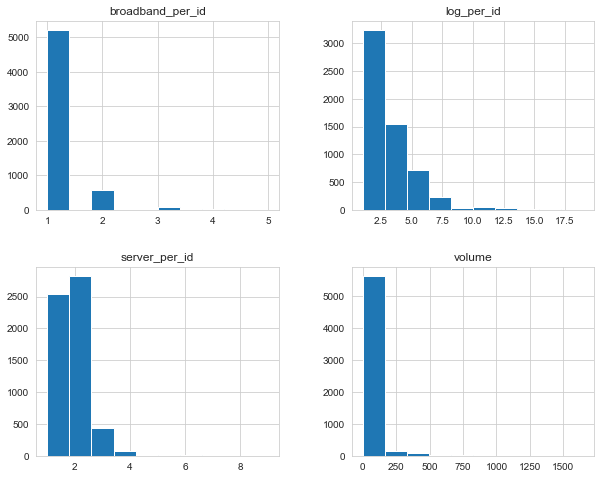

In [233]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

### Train-Validation Split

In [234]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(data, test_size = 0.2, random_state = 1234)

In [235]:
print("Shape of training set:", train.shape)
print("Shape of validation set:", valid.shape)

Shape of training set: (4723, 11)
Shape of validation set: (1181, 11)


**Separating the dependent and independent variables**

In [236]:
x_train = train.drop('outage_duration', axis = 1)
y_train = train['outage_duration']

x_valid = valid.drop('outage_duration', axis = 1)
y_valid = valid['outage_duration']

In [237]:
x_train = pd.get_dummies(x_train, columns = cat_cols, drop_first = True)
x_valid = pd.get_dummies(x_valid, columns = cat_cols, drop_first = True) 
x_test = pd.get_dummies(test,     columns = cat_cols, drop_first = True) 

In [238]:
print(x_train.shape)

print(x_valid.shape)

print(x_test.shape)

(4723, 26)
(1181, 26)
(1477, 26)


In [239]:
x_train.head()

,volume,log_per_id,server_per_id,broadband_per_id,area_bin_area_2,area_bin_area_3,area_bin_area_4,area_bin_area_5,area_bin_area_6,area_bin_area_7,area_bin_area_8,area_bin_area_9,area_bin_area_10,area_bin_area_11,outage_type_map_outage_2,outage_type_map_outage_3,log_report_log_report_2,log_report_log_report_3,log_report_log_report_4,log_report_log_report_5,log_report_log_report_6,transit_transit_2,transit_transit_3,transit_transit_4,broadband_broadband_2,area_longoutage_1
id,,,,,,,,,,,,,,,,,,,,,,,,,,
13171,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
10027,79,4,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
14832,7,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
3748,12,2,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
411,33,6,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [240]:
x_test.head()

,volume,log_per_id,server_per_id,broadband_per_id,area_bin_area_2,area_bin_area_3,area_bin_area_4,area_bin_area_5,area_bin_area_6,area_bin_area_7,area_bin_area_8,area_bin_area_9,area_bin_area_10,area_bin_area_11,outage_type_map_outage_2,outage_type_map_outage_3,log_report_log_report_2,log_report_log_report_3,log_report_log_report_4,log_report_log_report_5,log_report_log_report_6,transit_transit_2,transit_transit_3,transit_transit_4,broadband_broadband_2,area_longoutage_1
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3340,2,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
14067,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
1134,16,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
27,5,2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
9793,24,2,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [241]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()

x_train = SC.fit_transform(x_train)

x_valid = SC.transform(x_valid)

x_test = SC.transform(x_test)

## Model Building

In [242]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score

In [243]:
from sklearn.model_selection import GridSearchCV

In [244]:
# we define 2 list that one of them save results(F1-Macro avg) of models other list save name of model

labelList = []
resultList = []

### LogisticRegression

In [245]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 1)

LR.fit(x_train, y_train)

y_pred_LR_train = LR.predict(x_train)
y_pred_LR_valid = LR.predict(x_valid)

f1_lr_train = f1_score(y_train, y_pred_LR_train, average = 'macro')
f1_lr_valid = f1_score(y_valid, y_pred_LR_valid, average = 'macro')

print('Train F1 Macro')
print(f1_lr_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_lr_valid * 100)

# adding result and label to lists

labelList.append("LR")
resultList.append(f1_lr_valid)

Train F1 Macro
53.965471134068885
Validation F1 Macro
52.83395143147188


In [246]:
LR_tuned = LogisticRegression(penalty = 'l1', solver ='liblinear',
                              class_weight='balanced', random_state = 888)

LR_tuned.fit(x_train, y_train)

y_pred_LR_tuned_train = LR_tuned.predict(x_train)
y_pred_LR_tuned_valid = LR_tuned.predict(x_valid)

f1_lr_tuned_train = f1_score(y_train, y_pred_LR_tuned_train, average = 'macro')
f1_lr_tuned_valid = f1_score(y_valid, y_pred_LR_tuned_valid, average = 'macro')

print('Train F1 Macro')
print(f1_lr_tuned_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_lr_tuned_valid * 100)

# adding result and label to lists

labelList.append("LR Tuned")
resultList.append(f1_lr_tuned_valid)


Train F1 Macro
55.797693481303554
Validation F1 Macro
57.075870901240236


### Improving F1 score using SMOTE

In [266]:
!pip install imblearn

In [268]:
from imblearn.over_sampling import SMOTE

In [269]:
smote = SMOTE()

In [270]:
x_train_smote, y_train_smote = smote.fit_sample(x_train, y_train)

In [271]:
from collections import Counter

print('before smote : ', Counter(y_train)) 
print('after smote : ', Counter(y_train_smote)) 

before smote :  Counter({0: 3073, 1: 1197, 2: 453})
after smote :  Counter({1: 3073, 0: 3073, 2: 3073})


In [272]:
LR_tuned_smote = LogisticRegression(penalty = 'l1', solver ='liblinear',
                              class_weight='balanced', random_state = 888)

LR_tuned_smote.fit(x_train_smote, y_train_smote)

y_pred_LR_tuned_smote_train = LR_tuned_smote.predict(x_train)
y_pred_LR_tuned_smote_valid = LR_tuned_smote.predict(x_valid)

f1_lr_tuned_smote_train = f1_score(y_train, y_pred_LR_tuned_smote_train, average = 'macro')
f1_lr_tuned_smote_valid = f1_score(y_valid, y_pred_LR_tuned_smote_valid, average = 'macro')

print('Train F1 Macro')
print(f1_lr_tuned_smote_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_lr_tuned_smote_valid * 100)

# adding result and label to lists

labelList.append("LR tuned smote")
resultList.append(f1_lr_tuned_smote_valid)

Train F1 Macro
54.80281475347265
Validation F1 Macro
56.0487463983142


### KNN

In [257]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)

y_pred_KNN_train = KNN.predict(x_train)
y_pred_KNN_valid = KNN.predict(x_valid)

f1_KNN_train = f1_score(y_train, y_pred_KNN_train, average = 'macro')
f1_KNN_valid = f1_score(y_valid, y_pred_KNN_valid, average = 'macro')

print('Train F1 Macro')
print(f1_KNN_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_KNN_valid * 100)

# adding result and label to lists

labelList.append("KNN")
resultList.append(f1_KNN_valid)

Train F1 Macro
66.91471553877375
Validation F1 Macro
54.9797603670379


In [258]:
def KNN_model_evaluation(y_train, y_pred_KNN_train, y_valid, y_pred_KNN_valid) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, y_pred_KNN_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================''')
    print(classification_report(y_valid, y_pred_KNN_valid)) 
    

In [259]:
KNN_model_evaluation(y_train, y_pred_KNN_train, y_valid, y_pred_KNN_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      3073
           1       0.61      0.58      0.59      1197
           2       0.72      0.47      0.57       453

    accuracy                           0.76      4723
   macro avg       0.72      0.64      0.67      4723
weighted avg       0.75      0.76      0.75      4723


               CLASSIFICATION REPORT FOR VALIDATION DATA
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       754
           1       0.47      0.46      0.47       299
           2       0.51      0.31      0.39       128

    accuracy                           0.68      1181
   macro avg       0.58      0.53      0.55      1181
weighted avg       0.67      0.68      0.67      1181



In [301]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,15))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_tuned = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_tuned, hyperparameters, n_jobs = -1, scoring = 'f1_micro', cv=5)

#Fit the model
best_model = clf.fit(x_train, y_train)

best_model.best_params_

{'leaf_size': 1, 'n_neighbors': 14, 'p': 2}

**Applying above parameters**

In [260]:
KNN_tuned = KNeighborsClassifier(leaf_size = 4, n_neighbors = 5, p = 2)

KNN_tuned.fit(x_train,y_train)

y_pred_KNN_tuned_train = KNN_tuned.predict(x_train)
y_pred_KNN_tuned_valid = KNN_tuned.predict(x_valid)

f1_KNN_tuned_train = f1_score(y_train, y_pred_KNN_tuned_train, average = 'macro')
f1_KNN_tuned_valid = f1_score(y_valid, y_pred_KNN_tuned_valid, average = 'macro')

print('Train F1 Macro')
print(f1_KNN_tuned_train*100)

print('===================')

print('Validation F1 Macro')
print(f1_KNN_tuned_valid*100)


Train F1 Macro
67.0983673579626
Validation F1 Macro
55.17980421179052


### Decision Tree

In [261]:
from sklearn.tree import DecisionTreeClassifier

In [262]:
DT = DecisionTreeClassifier(random_state = 1)

DT.fit(x_train, y_train)

y_pred_DT_train = DT.predict(x_train)
y_pred_DT_valid = DT.predict(x_valid)

f1_DT_train = f1_score(y_train, y_pred_DT_train, average = 'macro')
f1_DT_valid = f1_score(y_valid, y_pred_DT_valid, average = 'macro')

print('Train F1 Macro')
print(f1_DT_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_DT_valid * 100)

# adding result and label to lists

labelList.append("DT")
resultList.append(f1_DT_valid)


Train F1 Macro
87.63606906869269
Validation F1 Macro
55.59561638463008


In [263]:
def DT_model_evaluation(y_train, y_pred_DT_train, y_valid, y_pred_DT_valid) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, y_pred_DT_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================''')
    print(classification_report(y_valid, y_pred_DT_valid)) 
    

In [264]:
DT_model_evaluation(y_train, y_pred_DT_train, y_valid, y_pred_DT_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3073
           1       0.87      0.74      0.80      1197
           2       0.97      0.84      0.90       453

    accuracy                           0.90      4723
   macro avg       0.91      0.85      0.88      4723
weighted avg       0.90      0.90      0.89      4723


               CLASSIFICATION REPORT FOR VALIDATION DATA
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       754
           1       0.45      0.45      0.45       299
           2       0.49      0.38      0.43       128

    accuracy                           0.67      1181
   macro avg       0.57      0.54      0.56      1181
weighted avg       0.66      0.67      0.66      1181



#### Grid Search CV on Decision Tree

In [307]:
DT_GS = DecisionTreeClassifier()

params_grid_DT={'criterion':['gini','entropy'],
                'splitter':['best','random'],
                'max_depth':[3,4,5,6,7],
                'min_samples_split':[1,2,3,4,5,6,7],
                'min_samples_leaf':[1,2,3,4,5,6],
                'class_weight':['balanced',None]}

grid_search_DT=GridSearchCV(DT_GS, params_grid_DT,
                            n_jobs=-1, scoring = 'f1_micro', cv = 5)

grid_search_DT.fit(x_train,y_train)

grid_search_DT.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

**Applying above parameters**

In [265]:
DT_tuned = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, 
                                  min_samples_leaf = 1, min_samples_split = 3, splitter = 'best', random_state = 8888)

DT_tuned.fit(x_train,y_train)

y_pred_DT_tuned_train = DT_tuned.predict(x_train)
y_pred_DT_tuned_valid = DT_tuned.predict(x_valid)

f1_dt_tuned_train = f1_score(y_train, y_pred_DT_tuned_train, average = 'macro')
f1_dt_tuned_valid = f1_score(y_valid, y_pred_DT_tuned_valid, average = 'macro')

print('Train F1 Macro')
print(f1_dt_tuned_train*100)

print('===================')

print('Validation F1 Macro')
print(f1_dt_tuned_valid*100)

# adding result and label to lists

labelList.append("DT Tuned")
resultList.append(f1_dt_tuned_valid)

Train F1 Macro
60.481582207715725
Validation F1 Macro
56.668638245652524


### Random Forest 

In [258]:
from sklearn.ensemble import RandomForestClassifier

In [259]:
RF = RandomForestClassifier(random_state = 1)

RF.fit(x_train, y_train)

y_pred_RF_train = RF.predict(x_train)
y_pred_RF_valid = RF.predict(x_valid)

f1_RF_train = f1_score(y_train, y_pred_RF_train, average = 'macro')
f1_RF_valid = f1_score(y_valid, y_pred_RF_valid, average = 'macro')

print('Train F1 Macro')
print(f1_RF_train * 100)

print('======================')

print('Validation F1 Macro')
print(f1_RF_valid * 100)

# adding result and label to lists

labelList.append("RF")
resultList.append(f1_RF_valid)


Train F1 Macro
87.92488950030757
Validation F1 Macro
58.11754606630768


In [260]:
def RF_model_evaluation(y_train, y_pred_RF_train, y_valid, y_pred_RF_valid) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, y_pred_RF_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================''')
    print(classification_report(y_valid, y_pred_RF_valid)) 

In [261]:
RF_model_evaluation(y_train, y_pred_RF_train, y_valid, y_pred_RF_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3073
           1       0.85      0.77      0.81      1197
           2       0.92      0.89      0.90       453

    accuracy                           0.90      4723
   macro avg       0.89      0.87      0.88      4723
weighted avg       0.89      0.90      0.89      4723


               CLASSIFICATION REPORT FOR VALIDATION DATA
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       754
           1       0.47      0.46      0.47       299
           2       0.53      0.44      0.48       128

    accuracy                           0.68      1181
   macro avg       0.59      0.57      0.58      1181
weighted avg       0.68      0.68      0.68      1181



#### Grid Search CV - Random Forest

In [314]:
RF_GS = RandomForestClassifier()
params_grid_RF = {'criterion':['gini','entropy'],
                 'max_depth':[12,13,14,15,16],
                 'min_samples_split':[4,5,6,7,8],
                 'min_samples_leaf':[1,2,3],
                 'class_weight':['balanced','balanced_subsample',None]}

grid_search_RF = GridSearchCV(RF_GS,params_grid_RF,
                              n_jobs=-1, scoring='f1_micro',cv=5)

grid_search_RF.fit(x_train,y_train)

grid_search_RF.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

**Applying above parameters**

In [262]:
RF_tuned=RandomForestClassifier(criterion = 'entropy', max_depth = 8, class_weight = 'balanced',
                                min_samples_leaf = 3, min_samples_split = 2, random_state = 8888)

RF_tuned.fit(x_train,y_train)

y_pred_RF_tuned_train =RF_tuned.predict(x_train)

y_pred_RF_tuned_valid =RF_tuned.predict(x_valid)

y_pred_RF_tuned_test = RF_tuned.predict(x_test)

f1_rf_tuned_train = f1_score(y_train, y_pred_RF_tuned_train, average='macro')
f1_rf_tuned_valid = f1_score(y_valid, y_pred_RF_tuned_valid, average='macro')

print('Train F1 Macro')
print(f1_rf_tuned_train*100)

print('====================')

print('Validation F1 Macro')
print(f1_rf_tuned_valid*100)

# adding result and label to lists

labelList.append("RF Tuned")
resultList.append(f1_rf_tuned_valid)



Train F1 Macro
60.50412043604688
Validation F1 Macro
57.44082327567751


In [263]:
print(RF_tuned.feature_importances_)

[3.45330727e-01 6.72313506e-02 3.21082488e-02 1.42771367e-02
 1.41438154e-02 6.80015681e-03 4.08367345e-03 3.11374137e-02
 1.10687586e-02 6.49191600e-03 4.67390033e-03 6.21680240e-03
 3.73330298e-03 8.25354525e-03 1.37908816e-02 2.75668953e-04
 3.46634466e-02 2.25547754e-02 2.13490048e-02 7.40155117e-02
 4.06714498e-02 6.05149122e-02 1.74979910e-02 1.04306865e-02
 4.64218060e-03 1.44042743e-01]


### CatBoost

In [272]:
from catboost import CatBoostClassifier

import catboost as cb

In [273]:
CB = CatBoostClassifier()

CB.fit(x_train,y_train)

y_pred_CB_train = CB.predict(x_train)
y_pred_CB_valid = CB.predict(x_valid)

f1_cb_train = f1_score(y_train, y_pred_CB_train, average = 'macro')
f1_cb_valid = f1_score(y_valid, y_pred_CB_valid, average = 'macro')

Learning rate set to 0.085646
0:	learn: 1.0413599	total: 58.1ms	remaining: 58s
1:	learn: 0.9969798	total: 63.2ms	remaining: 31.5s
2:	learn: 0.9646903	total: 68.7ms	remaining: 22.8s
3:	learn: 0.9318612	total: 74.6ms	remaining: 18.6s
4:	learn: 0.9044555	total: 83.4ms	remaining: 16.6s
5:	learn: 0.8771152	total: 89.3ms	remaining: 14.8s
6:	learn: 0.8558259	total: 95.5ms	remaining: 13.5s
7:	learn: 0.8340708	total: 102ms	remaining: 12.6s
8:	learn: 0.8175141	total: 108ms	remaining: 11.9s
9:	learn: 0.8024795	total: 115ms	remaining: 11.4s
10:	learn: 0.7898453	total: 121ms	remaining: 10.9s
11:	learn: 0.7794549	total: 127ms	remaining: 10.5s
12:	learn: 0.7681055	total: 141ms	remaining: 10.7s
13:	learn: 0.7552383	total: 164ms	remaining: 11.5s
14:	learn: 0.7463729	total: 180ms	remaining: 11.8s
15:	learn: 0.7359185	total: 196ms	remaining: 12s
16:	learn: 0.7277964	total: 214ms	remaining: 12.4s
17:	learn: 0.7193990	total: 222ms	remaining: 12.1s
18:	learn: 0.7141928	total: 232ms	remaining: 12s
19:	learn:

178:	learn: 0.5448564	total: 1.59s	remaining: 7.3s
179:	learn: 0.5443948	total: 1.6s	remaining: 7.29s
180:	learn: 0.5440628	total: 1.61s	remaining: 7.28s
181:	learn: 0.5439061	total: 1.61s	remaining: 7.26s
182:	learn: 0.5435384	total: 1.62s	remaining: 7.25s
183:	learn: 0.5431853	total: 1.63s	remaining: 7.25s
184:	learn: 0.5427427	total: 1.64s	remaining: 7.24s
185:	learn: 0.5423818	total: 1.65s	remaining: 7.22s
186:	learn: 0.5421407	total: 1.66s	remaining: 7.21s
187:	learn: 0.5418504	total: 1.67s	remaining: 7.21s
188:	learn: 0.5415445	total: 1.67s	remaining: 7.19s
189:	learn: 0.5411697	total: 1.68s	remaining: 7.17s
190:	learn: 0.5409284	total: 1.69s	remaining: 7.15s
191:	learn: 0.5405346	total: 1.7s	remaining: 7.16s
192:	learn: 0.5402959	total: 1.73s	remaining: 7.25s
193:	learn: 0.5398504	total: 1.74s	remaining: 7.23s
194:	learn: 0.5395634	total: 1.76s	remaining: 7.25s
195:	learn: 0.5392544	total: 1.77s	remaining: 7.25s
196:	learn: 0.5387618	total: 1.78s	remaining: 7.26s
197:	learn: 0.5

347:	learn: 0.5006695	total: 2.83s	remaining: 5.29s
348:	learn: 0.5004655	total: 2.83s	remaining: 5.28s
349:	learn: 0.5003259	total: 2.84s	remaining: 5.27s
350:	learn: 0.5000013	total: 2.85s	remaining: 5.26s
351:	learn: 0.4996991	total: 2.85s	remaining: 5.25s
352:	learn: 0.4995247	total: 2.86s	remaining: 5.24s
353:	learn: 0.4993321	total: 2.87s	remaining: 5.23s
354:	learn: 0.4991985	total: 2.87s	remaining: 5.22s
355:	learn: 0.4989929	total: 2.88s	remaining: 5.21s
356:	learn: 0.4988417	total: 2.89s	remaining: 5.2s
357:	learn: 0.4987672	total: 2.9s	remaining: 5.2s
358:	learn: 0.4984273	total: 2.91s	remaining: 5.19s
359:	learn: 0.4981318	total: 2.93s	remaining: 5.21s
360:	learn: 0.4979127	total: 2.94s	remaining: 5.2s
361:	learn: 0.4977197	total: 2.95s	remaining: 5.2s
362:	learn: 0.4974722	total: 2.97s	remaining: 5.21s
363:	learn: 0.4972758	total: 2.99s	remaining: 5.23s
364:	learn: 0.4970759	total: 3s	remaining: 5.22s
365:	learn: 0.4969162	total: 3.02s	remaining: 5.24s
366:	learn: 0.496843

511:	learn: 0.4722658	total: 4.5s	remaining: 4.29s
512:	learn: 0.4720782	total: 4.52s	remaining: 4.29s
513:	learn: 0.4719514	total: 4.53s	remaining: 4.28s
514:	learn: 0.4718912	total: 4.54s	remaining: 4.27s
515:	learn: 0.4716686	total: 4.57s	remaining: 4.28s
516:	learn: 0.4715089	total: 4.58s	remaining: 4.28s
517:	learn: 0.4713407	total: 4.59s	remaining: 4.27s
518:	learn: 0.4711542	total: 4.6s	remaining: 4.27s
519:	learn: 0.4710956	total: 4.61s	remaining: 4.26s
520:	learn: 0.4709936	total: 4.63s	remaining: 4.26s
521:	learn: 0.4708036	total: 4.64s	remaining: 4.25s
522:	learn: 0.4706988	total: 4.65s	remaining: 4.24s
523:	learn: 0.4705137	total: 4.66s	remaining: 4.23s
524:	learn: 0.4703614	total: 4.66s	remaining: 4.22s
525:	learn: 0.4701599	total: 4.67s	remaining: 4.21s
526:	learn: 0.4699721	total: 4.67s	remaining: 4.2s
527:	learn: 0.4698615	total: 4.68s	remaining: 4.18s
528:	learn: 0.4697276	total: 4.69s	remaining: 4.17s
529:	learn: 0.4695541	total: 4.7s	remaining: 4.16s
530:	learn: 0.46

670:	learn: 0.4514331	total: 5.74s	remaining: 2.82s
671:	learn: 0.4513234	total: 5.75s	remaining: 2.81s
672:	learn: 0.4512333	total: 5.76s	remaining: 2.8s
673:	learn: 0.4511487	total: 5.81s	remaining: 2.81s
674:	learn: 0.4510397	total: 5.82s	remaining: 2.8s
675:	learn: 0.4509409	total: 5.84s	remaining: 2.8s
676:	learn: 0.4508105	total: 5.85s	remaining: 2.79s
677:	learn: 0.4507278	total: 5.87s	remaining: 2.79s
678:	learn: 0.4506306	total: 5.88s	remaining: 2.78s
679:	learn: 0.4505111	total: 5.89s	remaining: 2.77s
680:	learn: 0.4504406	total: 5.89s	remaining: 2.76s
681:	learn: 0.4503209	total: 5.9s	remaining: 2.75s
682:	learn: 0.4501260	total: 5.91s	remaining: 2.74s
683:	learn: 0.4500722	total: 5.92s	remaining: 2.73s
684:	learn: 0.4499732	total: 5.93s	remaining: 2.73s
685:	learn: 0.4497799	total: 5.94s	remaining: 2.72s
686:	learn: 0.4496948	total: 5.94s	remaining: 2.71s
687:	learn: 0.4496005	total: 5.95s	remaining: 2.7s
688:	learn: 0.4494598	total: 5.96s	remaining: 2.69s
689:	learn: 0.449

831:	learn: 0.4338133	total: 6.97s	remaining: 1.41s
832:	learn: 0.4337485	total: 7s	remaining: 1.4s
833:	learn: 0.4336861	total: 7.02s	remaining: 1.4s
834:	learn: 0.4335809	total: 7.04s	remaining: 1.39s
835:	learn: 0.4334204	total: 7.06s	remaining: 1.38s
836:	learn: 0.4333304	total: 7.07s	remaining: 1.38s
837:	learn: 0.4332672	total: 7.13s	remaining: 1.38s
838:	learn: 0.4331199	total: 7.14s	remaining: 1.37s
839:	learn: 0.4330382	total: 7.16s	remaining: 1.36s
840:	learn: 0.4329480	total: 7.17s	remaining: 1.35s
841:	learn: 0.4328580	total: 7.19s	remaining: 1.35s
842:	learn: 0.4327488	total: 7.22s	remaining: 1.34s
843:	learn: 0.4325384	total: 7.24s	remaining: 1.34s
844:	learn: 0.4324904	total: 7.26s	remaining: 1.33s
845:	learn: 0.4323447	total: 7.28s	remaining: 1.32s
846:	learn: 0.4322316	total: 7.29s	remaining: 1.32s
847:	learn: 0.4321115	total: 7.29s	remaining: 1.31s
848:	learn: 0.4320446	total: 7.3s	remaining: 1.3s
849:	learn: 0.4319363	total: 7.3s	remaining: 1.29s
850:	learn: 0.431832

992:	learn: 0.4195841	total: 8.61s	remaining: 60.7ms
993:	learn: 0.4195486	total: 8.67s	remaining: 52.3ms
994:	learn: 0.4194308	total: 8.68s	remaining: 43.6ms
995:	learn: 0.4193104	total: 8.7s	remaining: 35ms
996:	learn: 0.4192227	total: 8.71s	remaining: 26.2ms
997:	learn: 0.4191000	total: 8.72s	remaining: 17.5ms
998:	learn: 0.4190474	total: 8.73s	remaining: 8.74ms
999:	learn: 0.4189499	total: 8.74s	remaining: 0us


In [274]:
print('Train F1 Macro')
print(f1_cb_train * 100)

print('====================')

print('Validation F1 Macro')
print(f1_cb_valid * 100)

# adding result and label to lists

labelList.append("CB")
resultList.append(f1_cb_valid)


Train F1 Macro
76.90884820882474
Validation F1 Macro
60.496680632635766


### Gradient Boosting

In [275]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 1)

GB.fit(x_train,y_train)

y_pred_GB_train = GB.predict(x_train)
y_pred_GB_valid = GB.predict(x_valid)

f1_gb_train = f1_score(y_train,y_pred_GB_train, average ='macro')
f1_gb_valid = f1_score(y_valid,y_pred_GB_valid, average ='macro')

print('Train F1 Macro')
print(f1_gb_train*100)

print('====================')

print('Validation F1 Macro')
print(f1_gb_valid*100)

# adding result and label to lists

labelList.append("GB")
resultList.append(f1_gb_valid)


Train F1 Macro
64.5797569615488
Validation F1 Macro
55.47447759223355


#### Grid Search CV - Gradient Boosting

In [322]:
GB_GS = GradientBoostingClassifier()

params_grid_GB = {'max_depth':[15,16,17],
                 'min_samples_split':[4,5,6,7,8],
                 'min_samples_leaf':[1,2,3]}

grid_search_GB = GridSearchCV(GB_GS, params_grid_GB,
                              n_jobs = -1, scoring = 'f1_macro', cv = 5)

grid_search_GB.fit(x_train,y_train)

grid_search_GB.best_params_

{'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 4}

**Applying above parameters**

In [276]:
GB_tuned = GradientBoostingClassifier(max_depth = 7, min_samples_leaf = 1,
                                      min_samples_split = 6, random_state = 8888)

GB_tuned.fit(x_train, y_train)

y_pred_GB_tuned_train = GB_tuned.predict(x_train)

y_pred_GB_tuned_valid = GB_tuned.predict(x_valid)

f1_GB_tuned_train = f1_score(y_train, y_pred_GB_tuned_train, average = 'macro')
f1_GB_tuned_valid = f1_score(y_valid, y_pred_GB_tuned_valid, average = 'macro')

print('Train F1 Macro')
print(f1_GB_tuned_train*100)

print('====================')

print('Validation F1 Macro')
print(f1_GB_tuned_valid*100)

Train F1 Macro
82.86141517058076
Validation F1 Macro
59.488639456326084


### XGBoost

In [247]:
import xgboost as xgb

XGB = xgb.XGBClassifier(random_state = 1)
XGB.fit(x_train,y_train)
y_pred_XGB_train = XGB.predict(x_train)
y_pred_XGB_valid = XGB.predict(x_valid)

f1_xgb_train = f1_score(y_train, y_pred_XGB_train, average='macro')
f1_xgb_valid = f1_score(y_valid, y_pred_XGB_valid, average='macro')

print('Train F1 Macro')
print(f1_xgb_train*100)

print('====================')

print('Validation F1 Macro')
print(f1_xgb_valid*100)


Train F1 Macro
79.08853362647994
Validation F1 Macro
58.93444983657407


#### Grid Search CV - XGBoost

In [248]:
XGB_GS = xgb.XGBClassifier()
params_grid_XGB = {'max_depth':[7,8,9,10,11],
                   'min_child_weight':[1,2,3],
                   'gamma':[0.1,0.2],
                   'subsample':[0.7,0.8],
                   'colsample_bytree':[0.6,0.7,0.8],
                   'tree_method':['exact','approx','auto','hist','gpu_hist']}

grid_search_XGB = GridSearchCV(XGB_GS,params_grid_XGB,
                            n_jobs=-1, scoring='f1_macro', cv=5)

grid_search_XGB.fit(x_train,y_train)

grid_search_XGB.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'max_depth': 8,
 'min_child_weight': 3,
 'subsample': 0.8,
 'tree_method': 'approx'}

**Applying above parameters**

In [255]:
XGB_tuned = xgb.XGBClassifier(max_depth=8, gamma=0.2, min_child_weight=3, subsample=0.7, 
                              colsample_bytree=0.7, tree_method='approx', random_state = 8888)

XGB_tuned.fit(x_train,y_train)

y_pred_XGB_tuned_train = XGB_tuned.predict(x_train)
y_pred_XGB_tuned_valid = XGB_tuned.predict(x_valid)
y_pred_XGB_tuned_test = XGB_tuned.predict(x_test)

f1_xgb_tuned_train = f1_score(y_train, y_pred_XGB_tuned_train, average = 'macro')
f1_xgb_tuned_valid = f1_score(y_valid, y_pred_XGB_tuned_valid, average = 'macro')

print('Train F1 Macro')
print(f1_xgb_tuned_train*100)

print('Validation F1 Macro')
print(f1_xgb_tuned_valid*100)

# adding result and label to lists

labelList.append("XGB Tuned")
resultList.append(f1_xgb_tuned_valid)


Train F1 Macro
79.30754366619769
Validation F1 Macro
59.052286475116865


In [256]:
xgb_tuned_prediction = y_pred_XGB_tuned_test

submission = pd.DataFrame({"id": submission["id"],
                           "outage_duration":xgb_tuned_prediction})

submission.to_csv('sub_xgb_tuned.csv',index=False)

### Stacking

In [264]:
from mlxtend.classifier import StackingClassifier

classifier_1 = XGB_tuned
classifier_2 = RF_tuned

LR = LogisticRegression()

SC = StackingClassifier(classifiers = [classifier_1,classifier_2], meta_classifier = LR)

SC.fit(x_train,y_train)

y_pred_SC_train = SC.predict(x_train)
y_pred_SC_valid = SC.predict(x_valid)
y_pred_SC_test = SC.predict(x_test)

f1_SC_train = f1_score(y_train, y_pred_SC_train, average = 'macro')
f1_SC_valid = f1_score(y_valid, y_pred_SC_valid, average = 'macro')

print('Train F1 Macro')
print(f1_SC_train*100)

print('Validation F1 Macro')
print(f1_SC_valid*100)


Train F1 Macro
78.60758248519883
Validation F1 Macro
58.78165804092911


#### RF - Smoting

In [290]:
RF_tuned = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 8, 
                                min_samples_leaf = 2, min_samples_split = 6, n_estimators = 20, random_state = 143)

RF_tuned.fit(x_train_smote, y_train_smote)

y_pred_RF_tuned_train =RF_tuned.predict(x_train)

y_pred_RF_tuned_valid =RF_tuned.predict(x_valid)

y_pred_RF_tuned_test = RF_tuned.predict(x_test)

f1_rf_tuned_train = f1_score(y_train, y_pred_RF_tuned_train, average='macro')
f1_rf_tuned_valid = f1_score(y_valid, y_pred_RF_tuned_valid, average='macro')

print('Train F1 Macro')
print(f1_rf_tuned_train*100)

print('====================')

print('Validation F1 Macro')
print(f1_rf_tuned_valid*100)


Train F1 Macro
61.125457920849726
Validation F1 Macro
58.082647545782876


#### Gradient Boost - Smoting

In [277]:
GB_tuned = GradientBoostingClassifier(max_depth = 7, min_samples_leaf = 1,
                                      min_samples_split = 6, random_state = 8888)

GB_tuned.fit(x_train_smote, y_train_smote)

y_pred_GB_tuned_train = GB_tuned.predict(x_train)

y_pred_GB_tuned_valid = GB_tuned.predict(x_valid)

f1_GB_tuned_train = f1_score(y_train, y_pred_GB_tuned_train, average = 'macro')
f1_GB_tuned_valid = f1_score(y_valid, y_pred_GB_tuned_valid, average = 'macro')

print('Train F1 Macro')
print(f1_GB_tuned_train*100)

print('====================')

print('Validation F1 Macro')
print(f1_GB_tuned_valid*100)

Train F1 Macro
76.83927372039041
Validation F1 Macro
60.19493375057752


#### XGB - Smoting

In [297]:
XGB_tuned = xgb.XGBClassifier(max_depth=4, gamma=0.2, min_child_weight=3, subsample=0.7, 
                              colsample_bytree=0.6, tree_method='approx', random_state = 143)

XGB_tuned.fit(x_train_smote, y_train_smote)

y_pred_XGB_tuned_train = XGB_tuned.predict(x_train)
y_pred_XGB_tuned_valid = XGB_tuned.predict(x_valid)
y_pred_XGB_tuned_test = XGB_tuned.predict(x_test)

f1_xgb_tuned_smote_train = f1_score(y_train, y_pred_XGB_tuned_train, average = 'macro')
f1_xgb_tuned_smote_valid = f1_score(y_valid, y_pred_XGB_tuned_valid, average = 'macro')

print('Train F1 Macro')
print(f1_xgb_tuned_smote_train*100)

print('Validation F1 Macro')
print(f1_xgb_tuned_smote_valid*100)

# adding result and label to lists

labelList.append("XGB Tuned smote")
resultList.append(f1_xgb_tuned_smote_valid)

Train F1 Macro
68.77205195629794
Validation F1 Macro
60.696801030830905


In [298]:
xgb_tuned_smote_prediction = y_pred_XGB_tuned_test

submission = pd.DataFrame({"id": submission["id"],
                           "outage_duration":xgb_tuned_smote_prediction})

submission.to_csv('sub_xgb_tuned_smote.csv',index=False)

In [299]:
def XGB_model_evaluation(y_train, y_pred_XGB_tuned_train, y_valid, y_pred_XGB_tuned_valid) :
    
    print('\nConfusion Matrix :')
    print(confusion_matrix(y_train, y_pred_XGB_tuned_train) ) 
    
    print('\n Train Report : ')
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, y_pred_XGB_tuned_train))
    
    print('\nConfusion Matrix :')
    print(confusion_matrix(y_valid, y_pred_XGB_tuned_valid) ) 

    print('\n Validation Report : ')
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================''')
    print(classification_report(y_valid, y_pred_XGB_tuned_valid)) 
    

In [300]:
XGB_model_evaluation(y_train, y_pred_XGB_tuned_train, y_valid, y_pred_XGB_tuned_valid)


Confusion Matrix :
[[2365  515  193]
 [ 293  758  146]
 [  32   48  373]]

 Train Report : 

               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      3073
           1       0.57      0.63      0.60      1197
           2       0.52      0.82      0.64       453

    accuracy                           0.74      4723
   macro avg       0.66      0.74      0.69      4723
weighted avg       0.77      0.74      0.75      4723


Confusion Matrix :
[[558 145  51]
 [107 150  42]
 [ 12  30  86]]

 Validation Report : 

               CLASSIFICATION REPORT FOR VALIDATION DATA
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       754
           1       0.46      0.50      0.48       299
           2       0.48      0.67      0.56       128

    accuracy                           0.67      1181
   macro avg       0.59      0.64      0.61      1181


**A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.**

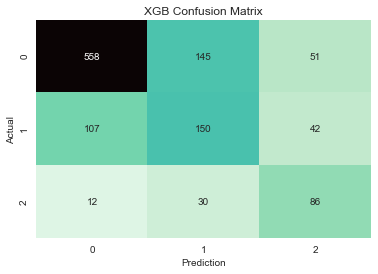

In [301]:
# confusion matrix of xgboost model

from sklearn.metrics import confusion_matrix

XGB_matrix = confusion_matrix(y_valid, y_pred_XGB_tuned_valid,labels=[0,1,2])

# heatmap to see confusion matrix

sns.heatmap(XGB_matrix, cbar=False, annot=True, cmap='mako_r',fmt='').set_title('XGB Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual');


**Precision (P) is defined as the number of true positives (TP) over the number of true positives plus the number of false positives (FP).**

In [307]:
Precision = TP / (TP + FP)

**(TP) True Positive:** The actual value was True, and the model predicted True

**(FP) False Positive:** The actual value was False, and the model predicted True. This is also known as a **Type I error.**

In [308]:
TP = 86

In [309]:
FP = 51 + 42

In [311]:
Precision                     # for class - 2 (long outage)

0.48044692737430167

**Precision** is a measure of result relevancy, while **recall** is a measure of how many truly relevant results are returned.

**Recall (R) is defined as the number of true positives (TP) over the number of true positives plus the number of false negatives (FN).**

**(FN) False Negative:** The actual value was True, and the model predicted False. This is also known as a **Type II error.**

In [328]:
FN = 12 + 30

In [329]:
Recall = TP / (TP + FN)

In [330]:
Recall                      # for class - 2 (long outage)

0.671875

We have got recall of 0.671 which is good for this model as it’s above 0.5.

**F1 score**, which is defined as the harmonic mean of precision and recall.

In [333]:
F1_Score = 2 * ( (Precision * Recall) / (Precision + Recall) )

In [334]:
F1_Score

0.5602605863192182

**(TN) True Negative:** The actual value was False, and the model predicted False.

In [335]:
TN = 558 + 150

**Accuracy** is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.

**Accuracy** is the sum of true positives and true negatives divided by the total number of samples.

In [336]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)

In [339]:
Accuracy = (86 + 558 + 150) / (1181)

In [340]:
Accuracy

0.672311600338696

For our model, we have got 0.672 accuracy which means **our model is approx. 67% accurate.**

In [341]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.**

**The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.**

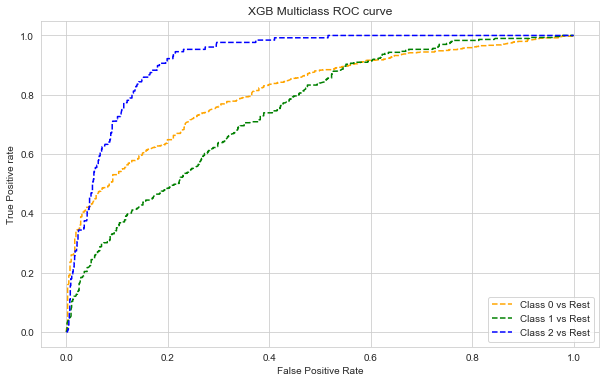

In [342]:
pred_prob = XGB_tuned.predict_proba(x_valid)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_valid, pred_prob[:,i], pos_label=i)
    
# plotting    

fig = plt.figure(figsize = (10,6))

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('XGB Multiclass ROC curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='lower right');


In [343]:
# predict probabilities

pred_prob1 = XGB_tuned.predict_proba(x_valid)
pred_prob2 = LR_tuned.predict_proba(x_valid)


In [344]:
# roc curve for models

fpr1, tpr1, thresh1 = roc_curve(y_valid, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_valid, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 

random_probs = [0 for i in range(len(y_valid))]

p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

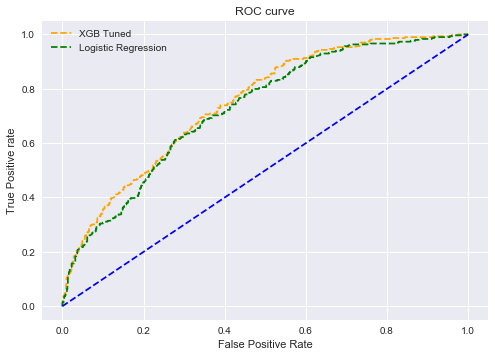

In [345]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGB Tuned')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [351]:
# First of all we combine 2 lists (labelList and resultList) by using zip method

zipped = zip(labelList, resultList)
zipped = list(zipped)

df = pd.DataFrame(zipped, columns=['label','F1 Macro'])
df.drop_duplicates(keep = 'first', inplace = True)

df

,label,F1 Macro
0,LR,0.528340
1,LR Tuned,0.570759
2,XGB Tuned,0.584809
3,XGB Tuned,0.587303
4,XGB Tuned,0.590523
5,XGB Tuned,0.589602
7,XGB Tuned,0.585919
9,RF,0.581175
10,RF Tuned,0.574408
11,LR tuned smote,0.560487


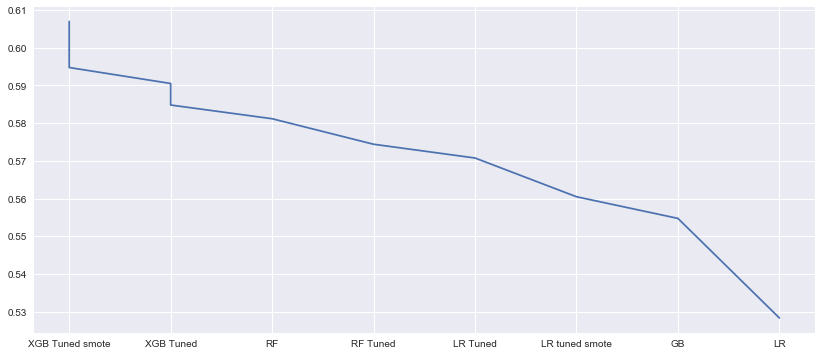

In [347]:
 # Viewing this df table in form of graph
    
new_index = (df['F1 Macro'].sort_values(ascending=False)).index.values 
sorted_data = df.reindex(new_index)

fig = plt.figure(figsize = (14,6))

plt.plot(sorted_data.loc[:,"label"],sorted_data.loc[:,"F1 Macro"])
plt.show()

**Conclusion**

Above Table and Graph shows that **Extreme gradient boost** (XGBoost) post tuning and by using the SMOTE technique has shown the best performance for this dataset to detect the class of Broadband Outage duration.

**Thank You!!!**

**Siddhi Golatkar**

**Batch 76 - 3344**